In [1]:
import pandas as pd

In [2]:
data_test = pd.read_csv("/Users/hazel/Documents/credit_project_data/application_test.csv")
print(data_test.shape)
data_train = pd.read_csv("/Users/hazel/Documents/credit_project_data/application_train.csv")
print(data_train.shape)
TARGET = data_train.iloc[:,0:2]

(48744, 121)
(307511, 122)


In [3]:
TARGET

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]

In [4]:
complete_data = pd.concat([data_train, data_test], ignore_index=True)
complete_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
3           100006     0.0         Cash loans           F            N   
4           100007     0.0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
356250      456221     NaN         Cash loans           F            N   
356251      456222     NaN         Cash loans           F            N   
356252      456223     NaN         Cash loans           F            Y   
356253      456224     NaN         Cash loans           M            N   
356254      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
356250               Y             0          121500.0    412560.0   
356251               N             2          157500.0    622413.0   
356252               Y             1          202500.0    315000.0   
356253               N             0          225000.0    450000.0   
356254               N             0          135000.0    312768.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
356250      17473.5  ...                 0                0                0   
356251      31909.5  ...                 0                0                0   
356252      33205.5  ...                 0                0                0   
356253      25128.0  ...                 0                0                0   
356254      24709.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
356250                0                        0.0                       0.0   
356251                0                        NaN                       NaN   
356252                0                        0.0                       0.0   
356253                0                        0.0                       0.0   
356254                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [5]:
complete_data['SK_ID_CURR'].nunique()

356255

In [6]:
# 看一下資料的形狀：是48744*121
complete_data.shape

(356255, 122)

In [7]:
# 查看資料的資訊
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        float64
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
# 計算空值站欄位的百分比
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# 缺失值統計68個欄位有缺失值
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
missing_values = missing_values_table(complete_data)
missing_values

Your selected dataframe has 122 columns.
There are 68 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_AVG                        248360               69.7
COMMONAREA_MEDI                       248360               69.7
COMMONAREA_MODE                       248360               69.7
NONLIVINGAPARTMENTS_MEDI              246861               69.3
NONLIVINGAPARTMENTS_MODE              246861               69.3
NONLIVINGAPARTMENTS_AVG               246861               69.3
FONDKAPREMONT_MODE                    243092               68.2
LIVINGAPARTMENTS_MEDI                 242979               68.2
LIVINGAPARTMENTS_AVG                  242979               68.2
LIVINGAPARTMENTS_MODE                 242979               68.2
FLOORSMIN_MODE                        241108               67.7
FLOORSMIN_MEDI                        241108               67.7
FLOORSMIN_AVG                         241108               67.7
YEARS_BUILD_AVG                       236306               66.3
YEARS_BUILD_MODE                      236306               66.3
YEARS_BUILD_MEDI                      236306               66.3
OWN_CAR_AGE                           235241               66.0
LANDAREA_MODE                         210844               59.2
LANDAREA_MEDI                         210844               59.2
LANDAREA_AVG                          210844               59.2
BASEMENTAREA_AVG                      207584               58.3
BASEMENTAREA_MODE                     207584               58.3
BASEMENTAREA_MEDI                     207584               58.3
NONLIVINGAREA_AVG                     195766               55.0
NONLIVINGAREA_MEDI                    195766               55.0
NONLIVINGAREA_MODE                    195766               55.0
EXT_SOURCE_1                          193910               54.4
ELEVATORS_MEDI                        189080               53.1
ELEVATORS_MODE                        189080               53.1
ELEVATORS_AVG                         189080               53.1
WALLSMATERIAL_MODE                    180234               50.6
APARTMENTS_MEDI                       179948               50.5
APARTMENTS_AVG                        179948               50.5
APARTMENTS_MODE                       179948               50.5
ENTRANCES_MODE                        178407               50.1
ENTRANCES_AVG                         178407               50.1
ENTRANCES_MEDI                        178407               50.1
HOUSETYPE_MODE                        177916               49.9
LIVINGAREA_MODE                       177902               49.9
LIVINGAREA_MEDI                       177902               49.9
LIVINGAREA_AVG                        177902               49.9
FLOORSMAX_MEDI                        176341               49.5
FLOORSMAX_MODE                        176341               49.5
FLOORSMAX_AVG                         176341               49.5
YEARS_BEGINEXPLUATATION_MEDI          172863               48.5
YEARS_BEGINEXPLUATATION_MODE          172863               48.5
YEARS_BEGINEXPLUATATION_AVG           172863               48.5
TOTALAREA_MODE                        171055               48.0
EMERGENCYSTATE_MODE                   167964               47.1
OCCUPATION_TYPE                       111996               31.4
EXT_SOURCE_3                           69633               19.5
TARGET                                 48744               13.7
AMT_REQ_CREDIT_BUREAU_HOUR             47568               13.4
AMT_REQ_CREDIT_BUREAU_DAY              47568               13.4
AMT_REQ_CREDIT_BUREAU_WEEK             47568               13.4
AMT_REQ_CREDIT_BUREAU_MON              47568               13.4
AMT_REQ_CREDIT_BUREAU_QRT              47568               13.4
AMT_REQ_CREDIT_BUREAU_YEAR             47568               13.4
NAME_TYPE_SUITE                         2203                0.6
OBS_30_CNT_SOCIAL_CIRCLE                1050                0.3
DEF_30_CNT_SOCIAL_CIRCLE                1050                0.3
OBS_60_CNT_SOCIAL_CIRCLE                1050                0.

## 檢查REGION_POPULATION_RELATIVE的異常值

In [10]:
# 檢查人口密度有沒有負的
complete_data['REGION_POPULATION_RELATIVE'].describe()

count    356255.000000
mean          0.020917
std           0.013915
min           0.000253
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

## 檢查DAYS_BIRTH的異常值

In [11]:
# 查看出生天數有沒有異常值
(complete_data['DAYS_BIRTH']/-365).describe() 

count    356255.000000
mean         43.948627
std          11.941929
min          20.104110
25%          34.041096
50%          43.164384
75%          53.906849
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## 檢查處理DAYS_EMPLOYED的異常值

In [12]:
# 查看工作天數異常值
(complete_data['DAYS_EMPLOYED']/-365).describe() 

count    356255.000000
mean       -176.211593
std         388.234336
min       -1000.665753
25%           0.794521
50%           3.353425
75%           7.619178
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [13]:
# 檢查是否異常值都是365243,答案：是
error = complete_data[complete_data['DAYS_EMPLOYED']>0] 
error['DAYS_EMPLOYED'].drop_duplicates()

8    365243
Name: DAYS_EMPLOYED, dtype: int64

In [14]:
# 總共有55374筆365243的異常值
error1 = error.groupby('DAYS_EMPLOYED').size() 
error1

DAYS_EMPLOYED
365243    64648
dtype: int64

In [15]:
# 新增欄位，註記異常值
complete_data['DAYS_EMPLOYED_ANOM'] = complete_data["DAYS_EMPLOYED"] == 365243
complete_data['DAYS_EMPLOYED_ANOM']

0         False
1         False
2         False
3         False
4         False
          ...  
356250    False
356251    False
356252    False
356253    False
356254    False
Name: DAYS_EMPLOYED_ANOM, Length: 356255, dtype: bool

In [16]:
# 觀察DAYS_EMPLOYE的欄位
complete_data['DAYS_EMPLOYED']

0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
356250   -5169
356251   -1149
356252   -3037
356253   -2731
356254    -633
Name: DAYS_EMPLOYED, Length: 356255, dtype: int64

In [17]:
# 把非365243的列挑出來取中位數，為了填補原本是異常值(365243的列)
non_anom = complete_data["DAYS_EMPLOYED"].apply(lambda x:0 if x==365243 else x)
non_anom.median()

-1224.0

In [18]:
# 將異常值填上該欄的中位數
complete_data['DAYS_EMPLOYED'].replace({365243: -1224.0}, inplace = True)

In [19]:
# 確定都有填上了
complete_data[complete_data['DAYS_EMPLOYED']==365243].count()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

# 檢查DAYS_REGISTRATION的異常值

In [20]:
# 查看註冊資料更改天數異常值
(complete_data['DAYS_REGISTRATION']/-365).describe() 

count    356255.000000
mean         13.653681
std           9.662929
min          -0.000000
25%           5.465753
50%          12.334247
75%          20.484932
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

# 檢查DAYS_ID_PUBLISH的異常值

In [21]:
# 查看身分資料更改天數異常值
(complete_data['DAYS_ID_PUBLISH']/-365).describe() 

count    356255.000000
mean          8.224853
std           4.158635
min          -0.000000
25%           4.704110
50%           8.909589
75%          11.830137
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

# 檢查OWN_CAR_AGE的異常值

In [22]:
# 查看車齡的異常值
(complete_data['OWN_CAR_AGE']).describe()

count    121014.000000
mean         12.023741
std          11.880848
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

# 檢查DAYS_LAST_PHONE_CHANGE的異常值

In [23]:
# 在幾天前更改電話號碼
(complete_data['DAYS_LAST_PHONE_CHANGE']/-365).describe()

count    356254.000000
mean          2.681043
std           2.287846
min          -0.000000
25%           0.783562
50%           2.112329
75%           4.361644
max          11.947945
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [24]:
# 計算缺失值百分比
pd.set_option('display.max_rows', None) # 想看到完整的資訊
missing_percent = complete_data.isnull().sum()/complete_data.shape[0]*100
missing_percent2 = missing_percent[ missing_percent > 0 ]
print(missing_percent2)
print(f'how many columns have missing values : {missing_percent2.shape[0]}')

TARGET                          13.682334
AMT_ANNUITY                      0.010105
AMT_GOODS_PRICE                  0.078034
NAME_TYPE_SUITE                  0.618377
OWN_CAR_AGE                     66.031635
OCCUPATION_TYPE                 31.437032
CNT_FAM_MEMBERS                  0.000561
EXT_SOURCE_1                    54.430113
EXT_SOURCE_2                     0.187506
EXT_SOURCE_3                    19.545831
APARTMENTS_AVG                  50.511010
BASEMENTAREA_AVG                58.268375
YEARS_BEGINEXPLUATATION_AVG     48.522266
YEARS_BUILD_AVG                 66.330578
COMMONAREA_AVG                  69.714109
ELEVATORS_AVG                   53.074343
ENTRANCES_AVG                   50.078455
FLOORSMAX_AVG                   49.498533
FLOORSMIN_AVG                   67.678489
LANDAREA_AVG                    59.183450
LIVINGAPARTMENTS_AVG            68.203674
LIVINGAREA_AVG                  49.936703
NONLIVINGAPARTMENTS_AVG         69.293343
NONLIVINGAREA_AVG               54

# 處理數值型欄位

In [25]:
# 類別型欄位決定以NA為一個新的欄位
# 選那些 missing values > 0 的欄位
mask = complete_data.loc[:,complete_data.isnull().sum()>0]
# print(mask.info())
# 選擇不是object的數值型欄位
data_nobject = mask.loc[:,mask.dtypes!='object']
print(data_nobject.info())
data_nobject.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        307511 non-null  float64
 1   AMT_ANNUITY                   356219 non-null  float64
 2   AMT_GOODS_PRICE               355977 non-null  float64
 3   OWN_CAR_AGE                   121014 non-null  float64
 4   CNT_FAM_MEMBERS               356253 non-null  float64
 5   EXT_SOURCE_1                  162345 non-null  float64
 6   EXT_SOURCE_2                  355587 non-null  float64
 7   EXT_SOURCE_3                  286622 non-null  float64
 8   APARTMENTS_AVG                176307 non-null  float64
 9   BASEMENTAREA_AVG              148671 non-null  float64
 10  YEARS_BEGINEXPLUATATION_AVG   183392 non-null  float64
 11  YEARS_BUILD_AVG               119949 non-null  float64
 12  COMMONAREA_AVG                107895 non-nul

(356255, 62)

In [26]:
# 把欄位們變成list
datalist = list(data_nobject.columns)
datalist

['TARGET',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIV

In [27]:
# 選出欄位和筆數
data_numerical = complete_data.loc[:,datalist]
data_numerical.shape

(356255, 62)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

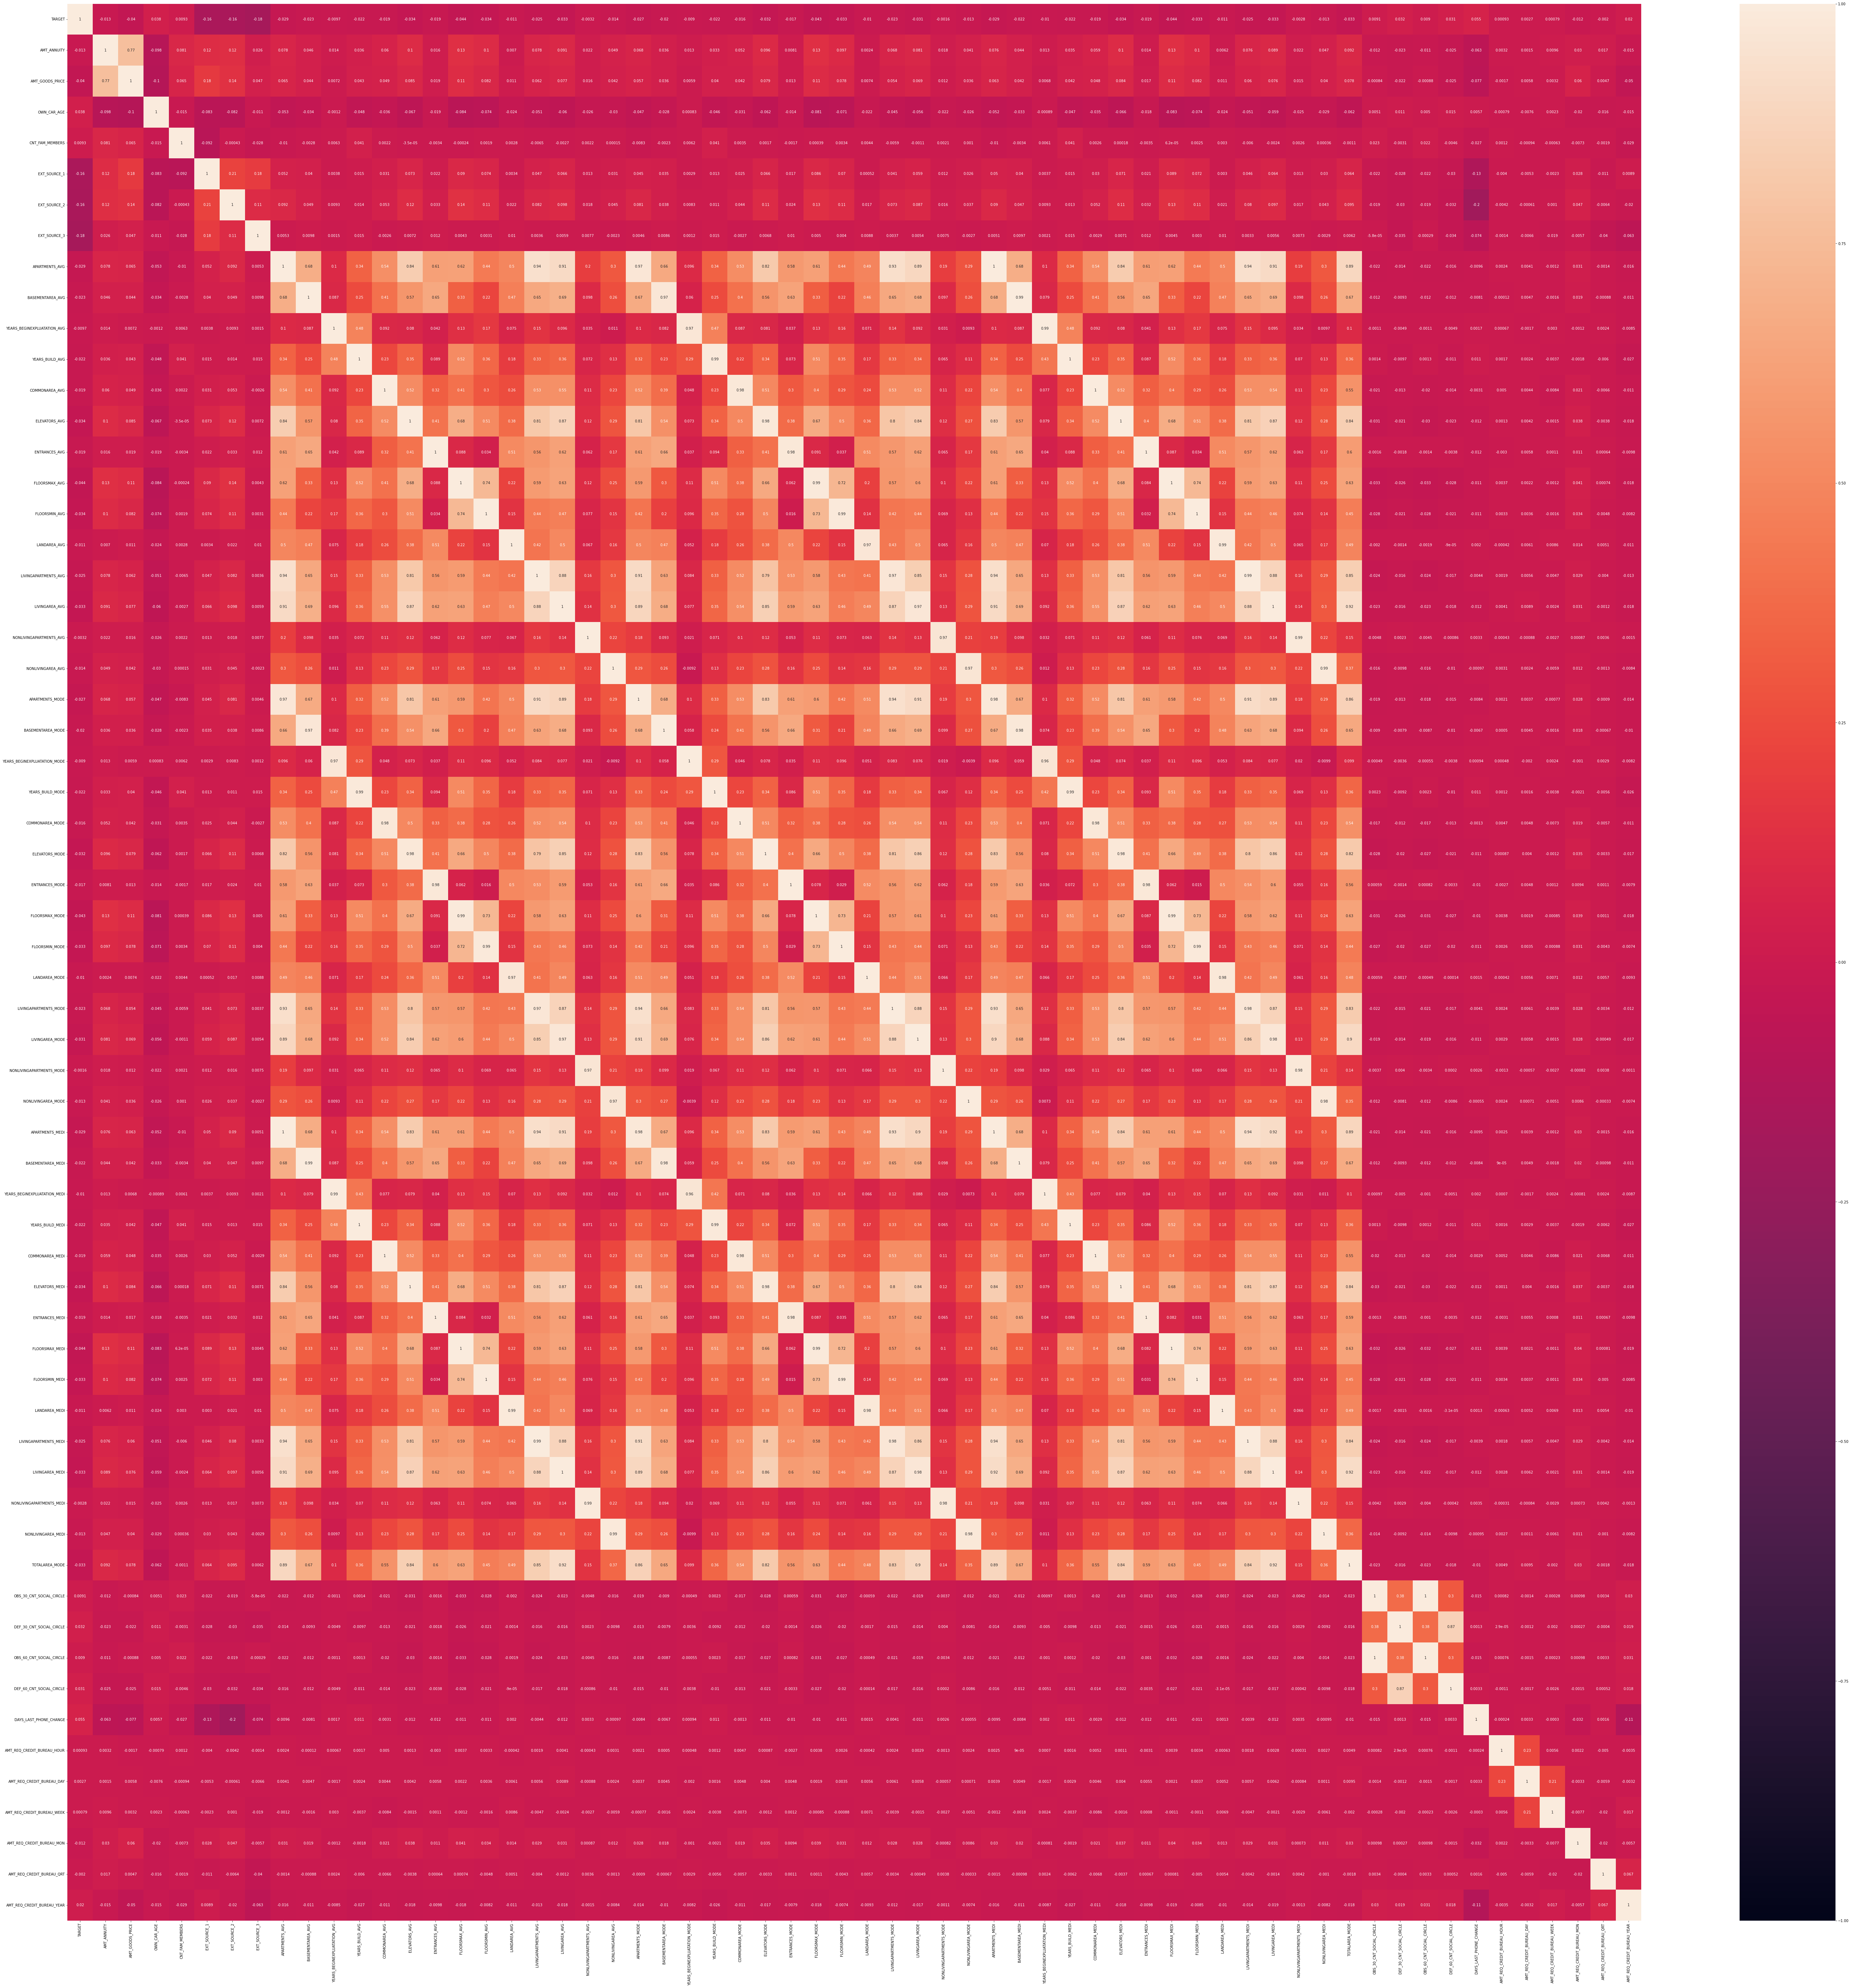

In [29]:
# 用heatmap去看他們的相關係數
plt.figure(figsize=(100, 100))
sns.heatmap(data_numerical.corr(), vmin=-1, vmax=1, annot=True);

In [30]:
# 找出相關性高於0.7的欄位
matrix = data_numerical.corr()
matrix = matrix.unstack()
matrix = matrix[(matrix<1.0) & (matrix>0.7)]

In [31]:
print(matrix)

AMT_ANNUITY                   AMT_GOODS_PRICE                 0.768123
AMT_GOODS_PRICE               AMT_ANNUITY                     0.768123
APARTMENTS_AVG                ELEVATORS_AVG                   0.837675
                              LIVINGAPARTMENTS_AVG            0.943868
                              LIVINGAREA_AVG                  0.913101
                              APARTMENTS_MODE                 0.973969
                              ELEVATORS_MODE                  0.823538
                              LIVINGAPARTMENTS_MODE           0.931327
                              LIVINGAREA_MODE                 0.893197
                              APARTMENTS_MEDI                 0.995341
                              ELEVATORS_MEDI                  0.835754
                              LIVINGAPARTMENTS_MEDI           0.941930
                              LIVINGAREA_MEDI                 0.911749
                              TOTALAREA_MODE                  0.891406
BASEME

In [32]:
# 抽出想要的留下的特徵(numerical),共28個
wantnum =  data_numerical[['AMT_ANNUITY','AMT_GOODS_PRICE','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
wantnum.head()

AMT_ANNUITY  AMT_GOODS_PRICE  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      24700.5         351000.0          0.0247            0.0369   
1      35698.5        1129500.0          0.0959            0.0529   
2       6750.0         135000.0             NaN               NaN   
3      29686.5         297000.0             NaN               NaN   
4      21865.5         513000.0             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ENTRANCES_AVG  FLOORSMAX_AVG  LANDAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0         0.0690         0.0833        0.0369                   0.0000   
1         0.0345         0.2917        0.0130                   0.0039   
2            NaN            NaN           NaN                      NaN   
3            NaN            NaN           NaN                      NaN   
4            NaN            NaN           NaN                      NaN   

   NONLIVINGAREA_AVG  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0             0.0000                       2.0                       2.0   
1             0.0098                       1.0                       0.0   
2                NaN                       0.0                       0.0   
3                NaN                       2.0                       0.0   
4                NaN                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  OWN_CAR_AGE  \
0                       2.0                       2.0          NaN   
1                       1.0                       0.0          NaN   
2                       0.0                       0.0         26.0   
3                       2.0                       0.0          NaN   
4                       0.0                       0.0          NaN   

   CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0              1.0      0.083037      0.262949      0.139376   
1              2.0      0.311267      0.622246           NaN   
2              1.0           NaN      0.555912      0.729567   
3              2.0           NaN      0.650442           NaN   
4              1.0           NaN      0.322738           NaN   

   DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 -1134.0                         0.0   
1                  -828.0                         0.0   
2                  -815.0                         0.0   
3                  -617.0                         NaN   
4                 -1106.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0

In [33]:
# Missing values statistics
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
missing_values = missing_values_table(wantnum)
print(missing_values)

Your selected dataframe has 28 columns.
There are 28 columns that have missing values.
                             Missing Values  % of Total Values
COMMONAREA_AVG                       248360               69.7
NONLIVINGAPARTMENTS_AVG              246861               69.3
YEARS_BUILD_AVG                      236306               66.3
OWN_CAR_AGE                          235241               66.0
LANDAREA_AVG                         210844               59.2
BASEMENTAREA_AVG                     207584               58.3
NONLIVINGAREA_AVG                    195766               55.0
EXT_SOURCE_1                         193910               54.4
APARTMENTS_AVG                       179948               50.5
ENTRANCES_AVG                        178407               50.1
FLOORSMAX_AVG                        176341               49.5
YEARS_BEGINEXPLUATATION_AVG          172863               48.5
EXT_SOURCE_3                          69633               19.5
AMT_REQ_CREDIT_BUREAU_QRT      

In [34]:
# 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',這四個欄位會一起空值，決定填中位數，不使用預測的方法
d = complete_data[['SK_ID_CURR','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].head(10000)
d[d.isnull().T.any()]
# d[d.isnull().values==True]

SK_ID_CURR  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
68        100080                       NaN                       NaN   
394       100457                       NaN                       NaN   
397       100460                       NaN                       NaN   
457       100527                       NaN                       NaN   
1042      101209                       NaN                       NaN   
1064      101235                       NaN                       NaN   
1156      101358                       NaN                       NaN   
1209      101424                       NaN                       NaN   
1486      101746                       NaN                       NaN   
1743      102038                       NaN                       NaN   
1844      102161                       NaN                       NaN   
1939      102272                       NaN                       NaN   
2702      103154                       NaN                       NaN   
2827      103301                       NaN                       NaN   
3066      103581                       NaN                       NaN   
3244      103787                       NaN                       NaN   
3410      103982                       NaN                       NaN   
3498      104083                       NaN                       NaN   
3719      104340                       NaN                       NaN   
3930      104593                       NaN                       NaN   
4217      104935                       NaN                       NaN   
4452      105205                       NaN                       NaN   
4608      105389                       NaN                       NaN   
5055      105909                       NaN                       NaN   
6218      107263                       NaN                       NaN   
6243      107292                       NaN                       NaN   
6431      107500                       NaN                       NaN   
6513      107597                       NaN                       NaN   
7077      108240                       NaN                       NaN   
7220      108403                       NaN                       NaN   
7540      108791                       NaN                       NaN   
7681      108957                       NaN                       NaN   
7986      109312                       NaN                       NaN   
8229      109595                       NaN                       NaN   
8375      109758                       NaN                       NaN   
8689      110114                       NaN                       NaN   
9015      110488                       NaN                       NaN   
9583      111138                       NaN                       NaN   
9677      111255                       NaN                       NaN   
9688      111272                       NaN                       NaN   
9872      111489                       NaN                       NaN   
9890      111508                       NaN                       NaN   

      DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  
68                         NaN                       NaN  
394                        NaN                       NaN  
397                        NaN                       NaN  
457                        NaN                       NaN  
1042                       NaN                       NaN  
1064                       NaN                       NaN  
1156                       NaN                       NaN  
1209                       NaN                       NaN  
1486                       NaN                       NaN  
1743                       NaN                       NaN  
1844                       NaN                       NaN  
1939                       NaN                       NaN  
2702                       NaN                       NaN  
2827                       NaN                       NaN  
3066                    

In [35]:
# 寫一個自動填中位數的函式
def fillnan_median (column):
    median = complete_data[column].median()
    complete_data[column] = complete_data[column].fillna(complete_data[column].median())
    result = complete_data[column].isnull().sum()
    return result,median

In [36]:
# 將欄位填入中位數
fillnan_median(['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_YEAR'])

(OBS_60_CNT_SOCIAL_CIRCLE      0
 DEF_60_CNT_SOCIAL_CIRCLE      0
 OBS_30_CNT_SOCIAL_CIRCLE      0
 DEF_30_CNT_SOCIAL_CIRCLE      0
 CNT_FAM_MEMBERS               0
 DAYS_LAST_PHONE_CHANGE        0
 AMT_REQ_CREDIT_BUREAU_QRT     0
 AMT_REQ_CREDIT_BUREAU_MON     0
 AMT_REQ_CREDIT_BUREAU_WEEK    0
 AMT_REQ_CREDIT_BUREAU_DAY     0
 AMT_REQ_CREDIT_BUREAU_HOUR    0
 AMT_REQ_CREDIT_BUREAU_YEAR    0
 dtype: int64,
 OBS_60_CNT_SOCIAL_CIRCLE        0.0
 DEF_60_CNT_SOCIAL_CIRCLE        0.0
 OBS_30_CNT_SOCIAL_CIRCLE        0.0
 DEF_30_CNT_SOCIAL_CIRCLE        0.0
 CNT_FAM_MEMBERS                 2.0
 DAYS_LAST_PHONE_CHANGE       -771.0
 AMT_REQ_CREDIT_BUREAU_QRT       0.0
 AMT_REQ_CREDIT_BUREAU_MON       0.0
 AMT_REQ_CREDIT_BUREAU_WEEK      0.0
 AMT_REQ_CREDIT_BUREAU_DAY       0.0
 AMT_REQ_CREDIT_BUREAU_HOUR      0.0
 AMT_REQ_CREDIT_BUREAU_YEAR      1.0
 dtype: float64)

In [37]:
# 猜AMT_ANNUITY是一年要還的錢，AMT_GOODS_PRICE是貸款用來買的商品的價錢，這時候就想拿他跟AMT_CREDIT比較一下，看看有沒有相關性
AMT_df = complete_data[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT']]
AMT_df.head(20)

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
0       24700.5         351000.0    406597.5
1       35698.5        1129500.0   1293502.5
2        6750.0         135000.0    135000.0
3       29686.5         297000.0    312682.5
4       21865.5         513000.0    513000.0
5       27517.5         454500.0    490495.5
6       41301.0        1395000.0   1560726.0
7       42075.0        1530000.0   1530000.0
8       33826.5         913500.0   1019610.0
9       20250.0         405000.0    405000.0
10      21177.0         652500.0    652500.0
11      10678.5         135000.0    148365.0
12       5881.5          67500.0     80865.0
13      28966.5         697500.0    918468.0
14      32778.0         679500.0    773680.5
15      20160.0         247500.0    299772.0
16      26149.5         387000.0    509602.5
17      13500.0         270000.0    270000.0
18       7875.0         157500.0    157500.0
19      17563.5         454500.0    544491.0

In [38]:
# 看一下他們之間的相關係數，發現他們之間的相關性很高
AMT_df.corr()

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
AMT_ANNUITY         1.000000         0.768123    0.762521
AMT_GOODS_PRICE     0.768123         1.000000    0.987159
AMT_CREDIT          0.762521         0.987159    1.000000

In [39]:
from sklearn import preprocessing
#建立StandardScaler物件
zscore = preprocessing.StandardScaler()
# 將資料標準化
AMT_df_normalized = zscore.fit_transform(AMT_df)
column_names = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT']
AMT_df_normalized = pd.DataFrame(AMT_df_normalized, columns=column_names)
AMT_df_normalized.head(100)

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
0     -0.184966        -0.483576   -0.454489
1      0.561533         1.643099    1.770432
2     -1.403371        -1.073636   -1.135828
3      0.153463        -0.631091   -0.690088
4     -0.377394        -0.041031   -0.187564
5      0.006240        -0.200839   -0.244020
6      0.941807         2.368381    2.440798
7      0.994343         2.737168    2.363718
8      0.434469         1.053039    1.083335
9     -0.487047        -0.336061   -0.458497
10    -0.424126         0.340049    0.162390
11    -1.136720        -1.073636   -1.102300
12    -1.462321        -1.258030   -1.271633
13     0.104593         0.462979    0.829607
14     0.363301         0.413807    0.466388
15    -0.493156        -0.766313   -0.722475
16    -0.086614        -0.385233   -0.196087
17    -0.945209        -0.704849   -0.797162
18    -1.327010        -1.012171   -1.079384
19    -0.669395        -0.200839   -0.108565
20    -0.410687        -0.274596   -0.402052
21     0.687985         1.089917    1.366720
22     0.345891        -0.213132   -0.226398
23    -0.242694        -0.827778   -0.872798
24    -0.999272        -0.766313   -0.853607
25    -1.109842        -0.827778   -0.910051
26    -0.023693         0.475271    0.983948
27    -0.244221        -0.704849   -0.654110
28     2.053307         0.401514    0.509410
29    -1.250650        -0.950707   -1.022940
30    -0.192296        -0.139374    0.195986
31    -0.162363        -0.458990   -0.189912
32    -0.443369        -0.950707   -0.975256
33     0.790308         0.413807    0.365127
34     0.371243         1.630806    1.347721
35     1.159586        -0.213132   -0.345608
36    -0.289732         0.069605    0.133976
37    -0.833112        -0.200839   -0.334319
38    -0.684667        -0.827778   -0.854171
39    -0.028885         0.032726   -0.119831
40     0.516022         0.893231    1.519763
41     0.120170         0.032726    0.041103
42    -0.757973        -0.790899   -0.749817
43     1.055125         0.401514    0.397650
44     1.415546         0.192534    0.185476
45    -1.250650        -0.950707   -1.022940
46    -0.663592        -0.754020   -0.708805
47    -0.039881        -0.827778   -0.820643
48     0.667215         2.245451    1.912163
49     1.527338         2.245451    2.305558
50    -1.403371        -1.073636   -1.135828
51     0.486699         0.401514    0.218835
52    -0.866405        -0.200839   -0.334319
53    -0.764388        -0.790899   -0.686645
54     0.342531         0.401514    0.218835
55     1.230754         0.376928    0.626306
56    -0.817534        -0.889242   -0.725094
57    -1.021569        -0.766313   -0.853607
58    -0.010864        -0.028738    0.132181
59     1.321776         1.643099    1.605863
60     4.042951         2.896976    2.699844
61     1.133013         1.507876    1.234832
62     0.866363         0.770301    1.362170
63    -1.151382        -1.196565   -1.233816
64    -1.204528        -0.581919   -0.684274
65     0.898129         1.016160    1.677355
66     1.123850         1.384947    1.121943
67    -0.945209        -0.704849   -0.797162
68    -0.334326        -0.213132   -0.345608
69    -0.428708        -0.213132   -0.345608
70    -0.428708        -0.213132   -0.345608
71    -0.202987        -0.176253   -0.035469
72    -0.087225        -0.188546   -0.231839
73     0.099705         0.401514    0.420002
74    -0.383502         0.401514    0.218835
75     0.704174         1.630806    1.757506
76    -1.403371        -1.073636   -1.135828
77    -0.790350        -0.741727   -0.627175
78     0.057555         0.155656   -0.006942
79    -1.501723        -1.196565   -1.189112
80    -1.403371        -1.073636   -1.135828
81    -0.870987        -0.754020   -0.842318
82     0.193781         0.413807    0.432634
83    -0.945209        -0.704849   -0.797162
84     0.926535         0.413807    0.365127
85     0.747852         0.315464    0.523374
86    -0.363343        -0.667970   -0.613086
87    -1.164821        -0.704849   -0.654110

In [40]:
# 將SK_ID_CURR加入，可以畫圖
AMT_df_normalized['SK_ID_CURR'] = complete_data['SK_ID_CURR']
AMT_df_normalized.head(100)

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT  SK_ID_CURR
0     -0.184966        -0.483576   -0.454489      100002
1      0.561533         1.643099    1.770432      100003
2     -1.403371        -1.073636   -1.135828      100004
3      0.153463        -0.631091   -0.690088      100006
4     -0.377394        -0.041031   -0.187564      100007
5      0.006240        -0.200839   -0.244020      100008
6      0.941807         2.368381    2.440798      100009
7      0.994343         2.737168    2.363718      100010
8      0.434469         1.053039    1.083335      100011
9     -0.487047        -0.336061   -0.458497      100012
10    -0.424126         0.340049    0.162390      100014
11    -1.136720        -1.073636   -1.102300      100015
12    -1.462321        -1.258030   -1.271633      100016
13     0.104593         0.462979    0.829607      100017
14     0.363301         0.413807    0.466388      100018
15    -0.493156        -0.766313   -0.722475      100019
16    -0.086614        -0.385233   -0.196087      100020
17    -0.945209        -0.704849   -0.797162      100021
18    -1.327010        -1.012171   -1.079384      100022
19    -0.669395        -0.200839   -0.108565      100023
20    -0.410687        -0.274596   -0.402052      100024
21     0.687985         1.089917    1.366720      100025
22     0.345891        -0.213132   -0.226398      100026
23    -0.242694        -0.827778   -0.872798      100027
24    -0.999272        -0.766313   -0.853607      100029
25    -1.109842        -0.827778   -0.910051      100030
26    -0.023693         0.475271    0.983948      100031
27    -0.244221        -0.704849   -0.654110      100032
28     2.053307         0.401514    0.509410      100033
29    -1.250650        -0.950707   -1.022940      100034
30    -0.192296        -0.139374    0.195986      100035
31    -0.162363        -0.458990   -0.189912      100036
32    -0.443369        -0.950707   -0.975256      100037
33     0.790308         0.413807    0.365127      100039
34     0.371243         1.630806    1.347721      100040
35     1.159586        -0.213132   -0.345608      100041
36    -0.289732         0.069605    0.133976      100043
37    -0.833112        -0.200839   -0.334319      100044
38    -0.684667        -0.827778   -0.854171      100045
39    -0.028885         0.032726   -0.119831      100046
40     0.516022         0.893231    1.519763      100047
41     0.120170         0.032726    0.041103      100048
42    -0.757973        -0.790899   -0.749817      100049
43     1.055125         0.401514    0.397650      100050
44     1.415546         0.192534    0.185476      100051
45    -1.250650        -0.950707   -1.022940      100052
46    -0.663592        -0.754020   -0.708805      100053
47    -0.039881        -0.827778   -0.820643      100054
48     0.667215         2.245451    1.912163      100055
49     1.527338         2.245451    2.305558      100056
50    -1.403371        -1.073636   -1.135828      100058
51     0.486699         0.401514    0.218835      100059
52    -0.866405        -0.200839   -0.334319      100060
53    -0.764388        -0.790899   -0.686645      100061
54     0.342531         0.401514    0.218835      100062
55     1.230754         0.376928    0.626306      100063
56    -0.817534        -0.889242   -0.725094      100064
57    -1.021569        -0.766313   -0.853607      100068
58    -0.010864        -0.028738    0.132181      100069
59     1.321776         1.643099    1.605863      100070
60     4.042951         2.896976    2.699844      100071
61     1.133013         1.507876    1.234832      100072
62     0.866363         0.770301    1.362170      100073
63    -1.151382        -1.196565   -1.233816      100075
64    -1.204528        -0.581919   -0.684274      100076
65     0.898129         1.016160    1.677355      100077
66     1.123850         1.384947    1.121943      100078
67    -0.945209        -0.704849   -0.797162      100079
68    -0.334326        -0.213132   -0.345608      100080
69    -0.42870

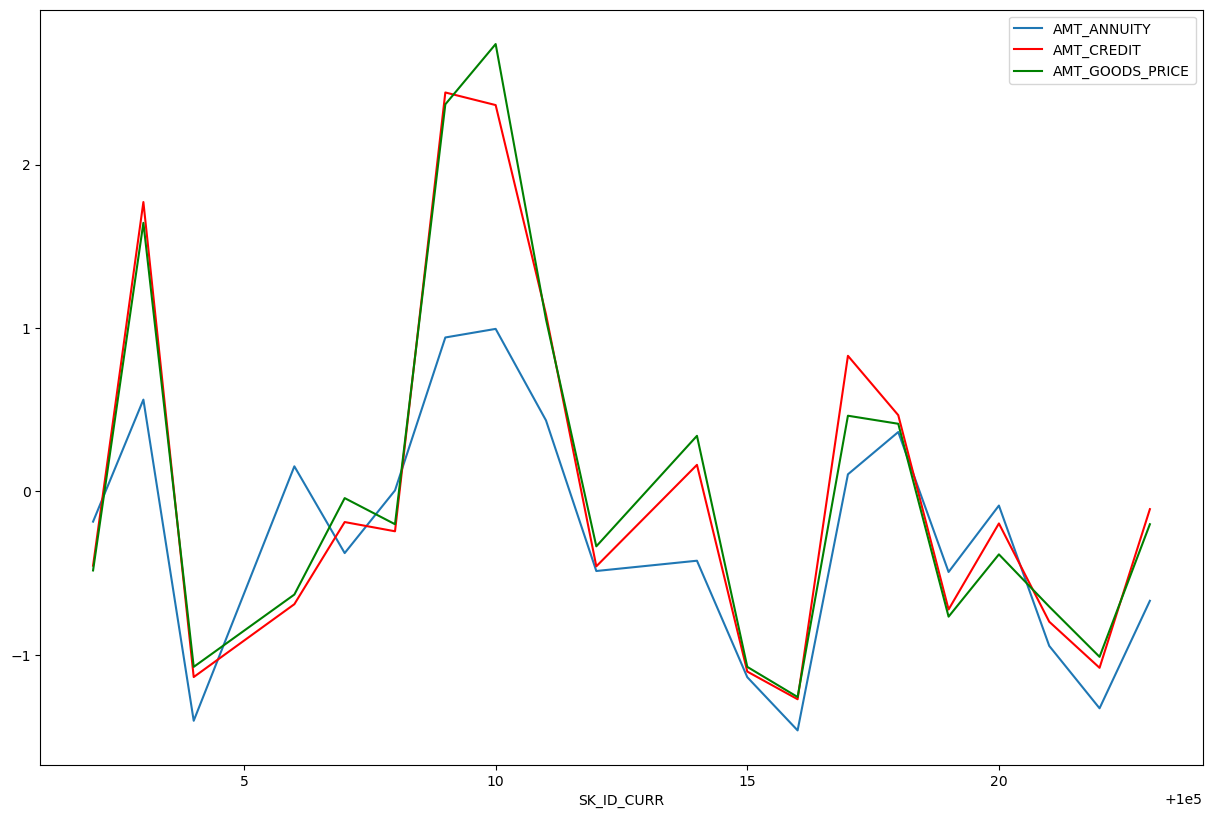

In [41]:
# gca stands for 'get current axis'，gca()是簡稱
# 可以看到AMT_ANNUITY和AMT_CREDIT有很高的相關性，想用RandomForest預測的方式去填補缺失值
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
ax = plt.gca() 
d = AMT_df_normalized.head(20)
d.plot(kind='line',x='SK_ID_CURR',y='AMT_ANNUITY',ax=ax)
d.plot(kind='line',x='SK_ID_CURR',y='AMT_CREDIT', color='red',ax=ax)
d.plot(kind='line',x='SK_ID_CURR',y='AMT_GOODS_PRICE', color='green',ax=ax);

# 用RandomForest來預測AMT_GOODS_PRICE和AMT_ANNUITY

In [42]:
AMT_df.shape

(356255, 3)

In [43]:
new_AMT_df = AMT_df.dropna()
new_AMT_df

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
0           24700.5         351000.0    406597.5
1           35698.5        1129500.0   1293502.5
2            6750.0         135000.0    135000.0
3           29686.5         297000.0    312682.5
4           21865.5         513000.0    513000.0
...             ...              ...         ...
356250      17473.5         270000.0    412560.0
356251      31909.5         495000.0    622413.0
356252      33205.5         315000.0    315000.0
356253      25128.0         450000.0    450000.0
356254      24709.5         270000.0    312768.0

[355941 rows x 3 columns]

In [44]:
# 把AMT_GOODS_PRICE=NaN的資料取出，用AMT_CREDIT去預測，利用RandomForest的方法預測
new_AMT_dfna = AMT_df[AMT_df['AMT_GOODS_PRICE'].isna() == True]
new_AMT_dfna.head(10)

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
724         6750.0              NaN    135000.0
5937       22500.0              NaN    450000.0
6425       10125.0              NaN    202500.0
6703        9000.0              NaN    180000.0
7647       22500.0              NaN    450000.0
7880       13500.0              NaN    270000.0
7995        9000.0              NaN    180000.0
10819      13500.0              NaN    270000.0
11287       6750.0              NaN    135000.0
13008      22500.0              NaN    450000.0

In [45]:
# 使用randomforest來預測'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT'這三個欄位
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error
from sklearn.datasets import load_iris
from sklearn import tree

X = new_AMT_df[['AMT_CREDIT']]
y = new_AMT_df['AMT_GOODS_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train.astype('int'))

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test.astype('int'), y_pred)
num_correct_samples = accuracy_score(y_test.astype('int'), y_pred, normalize=False)
con_matrix = confusion_matrix(y_test.astype('int'), y_pred)
mse = mean_squared_error(y_test.astype('int'),y_pred)

print(y_test.shape)
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('MSE: {}'.format(mse))

(71189,)
number of correct sample: 70508
accuracy: 0.9904339153520909
con_matrix: [[321   0   0 ...   0   0   0]
 [  0  37   0 ...   0   0   0]
 [  1   0  78 ...   0   0   0]
 ...
 [  0   0   0 ...   3   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0   1]]
MSE: 139964373.55439746


In [46]:
# 使用randomforest來預測'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_CREDIT'這三個欄位
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

X_train = new_AMT_df[['AMT_CREDIT']]
y_train = new_AMT_df['AMT_GOODS_PRICE']
X_test = new_AMT_dfna[['AMT_CREDIT']]
# y_test = new_AMT_dfna['AMT_GOODS_PRICE']
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train.astype('int'))

X_test = scaler.transform(X_test)
y_pred_AMT_GOODS_PRICE = model.predict(X_test)


# accuracy = accuracy_score(y_test.astype('int'), y_pred)
# num_correct_samples = accuracy_score(y_test.astype('int'), y_pred, normalize=False)
# con_matrix = confusion_matrix(y_test.astype('int'), y_pred)

# print('number of correct sample: {}'.format(num_correct_samples))
# print('accuracy: {}'.format(accuracy))
# print('con_matrix: {}'.format(con_matrix))
y_pred_AMT_GOODS_PRICE
# type(y_pred_AMT_GOODS_PRICE)

array([ 135000,  450000,  202500,  180000,  450000,  270000,  180000,
        270000,  135000,  450000,  270000,  270000,  180000,  180000,
        180000,  270000,  675000,  135000,  270000,  495000,  202500,
        450000,  315000,  247500,  405000,  450000,  180000,  202500,
        180000,  382500, 1350000,  202500,  202500,  675000,  135000,
       1350000,  135000,  135000,  270000,  270000,  337500,  270000,
        202500,  855000,  247500,  180000,  202500,  202500,  180000,
        180000,  675000,  202500,  180000,  270000,  135000,  180000,
        135000,  270000,  157500,  270000,  225000,  270000,  675000,
        202500,  270000,  180000,  405000,  247500,  270000,  270000,
        135000,  247500,  135000,  202500,  337500,  405000,  270000,
        202500,  180000,  135000,  135000,  135000,  405000,  180000,
        180000,  135000,  202500,  180000,  202500,  270000,  405000,
       1237500,  225000,  180000,  270000,  405000,  405000,  135000,
        202500,  135

In [47]:
Goods = list(AMT_df['AMT_GOODS_PRICE'])
Goods[724:6000]
print(type(Goods[724]))

<class 'float'>


In [48]:
import math
for index,value in enumerate(Goods):
    if math.isnan(value) == True:
        print(index)

724
5937
6425
6703
7647
7880
7995
10819
11287
13008
14699
15953
18935
19178
19921
21193
21338
21546
25391
26398
26736
27003
28201
29059
30164
30294
32143
36250
36721
39230
40571
41099
41161
41982
42024
43630
45657
47627
50540
52711
52955
54045
55600
56002
58595
58653
60622
61022
61072
61618
63319
64118
64184
66168
67609
69461
69525
70661
70731
72166
72902
74676
75036
78786
79108
79484
80669
83784
85172
85861
86000
86005
87095
87144
87226
88544
89085
89698
90898
96192
97022
102123
102245
106630
107559
107715
110972
112566
113036
113251
113449
114314
114788
116575
117302
117471
117483
123354
124123
124436
124770
128354
129705
130737
130800
131669
132208
133526
133548
134298
134327
136330
136424
137091
137354
137374
139558
142605
143606
145137
145278
145594
147294
149045
149111
149562
150425
152608
152898
153801
155673
155716
156456
158563
158785
161730
163709
163889
167777
168169
168588
169101
176663
179626
180925
183381
184811
186634
187032
187120
187145
187167
187348
188475
190113
1918

In [49]:
j = 0
for index,value in enumerate(Goods):
    if math.isnan(value) == True:
        Goods[index] = y_pred_AMT_GOODS_PRICE[j]
        j = j+1

print(Goods[724])
print(y_pred_AMT_GOODS_PRICE[0])

135000
135000


In [50]:
print(Goods[6703])

180000


In [51]:
type(Goods)

list

In [52]:
SK_ID_CURR = list(complete_data['SK_ID_CURR'])
SK_ID_CURR

[100002,
 100003,
 100004,
 100006,
 100007,
 100008,
 100009,
 100010,
 100011,
 100012,
 100014,
 100015,
 100016,
 100017,
 100018,
 100019,
 100020,
 100021,
 100022,
 100023,
 100024,
 100025,
 100026,
 100027,
 100029,
 100030,
 100031,
 100032,
 100033,
 100034,
 100035,
 100036,
 100037,
 100039,
 100040,
 100041,
 100043,
 100044,
 100045,
 100046,
 100047,
 100048,
 100049,
 100050,
 100051,
 100052,
 100053,
 100054,
 100055,
 100056,
 100058,
 100059,
 100060,
 100061,
 100062,
 100063,
 100064,
 100068,
 100069,
 100070,
 100071,
 100072,
 100073,
 100075,
 100076,
 100077,
 100078,
 100079,
 100080,
 100081,
 100082,
 100083,
 100084,
 100085,
 100086,
 100087,
 100088,
 100089,
 100093,
 100094,
 100095,
 100096,
 100097,
 100098,
 100099,
 100100,
 100101,
 100102,
 100103,
 100104,
 100105,
 100108,
 100110,
 100111,
 100112,
 100113,
 100114,
 100115,
 100116,
 100118,
 100119,
 100120,
 100121,
 100122,
 100123,
 100124,
 100125,
 100126,
 100127,
 100129,
 100130,
 

In [53]:
AMT_ANNUITY = list(AMT_df['AMT_ANNUITY'])
AMT_CREDIT = list(AMT_df['AMT_CREDIT'])

In [54]:
AMT_df2 = {"AMT_ANNUITY":AMT_ANNUITY,"AMT_GOODS_PRICE":Goods,"AMT_CREDIT":AMT_CREDIT}
AMT_df2 = pd.DataFrame(AMT_df2)
AMT_df2['AMT_GOODS_PRICE'].isnull().sum()

0

In [55]:
AMT_df2.index=SK_ID_CURR
AMT_df2

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
100002      24700.5         351000.0    406597.5
100003      35698.5        1129500.0   1293502.5
100004       6750.0         135000.0    135000.0
100006      29686.5         297000.0    312682.5
100007      21865.5         513000.0    513000.0
...             ...              ...         ...
456221      17473.5         270000.0    412560.0
456222      31909.5         495000.0    622413.0
456223      33205.5         315000.0    315000.0
456224      25128.0         450000.0    450000.0
456250      24709.5         270000.0    312768.0

[356255 rows x 3 columns]

In [56]:
AMT_df2.head(10)

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT
100002      24700.5         351000.0    406597.5
100003      35698.5        1129500.0   1293502.5
100004       6750.0         135000.0    135000.0
100006      29686.5         297000.0    312682.5
100007      21865.5         513000.0    513000.0
100008      27517.5         454500.0    490495.5
100009      41301.0        1395000.0   1560726.0
100010      42075.0        1530000.0   1530000.0
100011      33826.5         913500.0   1019610.0
100012      20250.0         405000.0    405000.0

## 合併另一種方式

In [57]:
AMT_df.index = SK_ID_CURR

In [58]:
AMT_df['AMT_GOODS_PRICE'].isnull().sum()

278

In [59]:
#把Goods變成dataframe
Goods_price = pd.DataFrame(Goods,index=SK_ID_CURR,columns=['AMT_GOODS_PRICE'])
Goods_price

AMT_GOODS_PRICE
100002         351000.0
100003        1129500.0
100004         135000.0
100006         297000.0
100007         513000.0
...                 ...
456221         270000.0
456222         495000.0
456223         315000.0
456224         450000.0
456250         270000.0

[356255 rows x 1 columns]

In [60]:
#把原本的AMT_GOODS_PRICE欄位拿掉
del AMT_df['AMT_GOODS_PRICE']
AMT_df

AMT_ANNUITY  AMT_CREDIT
100002      24700.5    406597.5
100003      35698.5   1293502.5
100004       6750.0    135000.0
100006      29686.5    312682.5
100007      21865.5    513000.0
...             ...         ...
456221      17473.5    412560.0
456222      31909.5    622413.0
456223      33205.5    315000.0
456224      25128.0    450000.0
456250      24709.5    312768.0

[356255 rows x 2 columns]

In [61]:
AMT_df3 = AMT_df.merge(Goods_price,how='outer',left_index=True,right_index=True)
AMT_df3

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE
100002      24700.5    406597.5         351000.0
100003      35698.5   1293502.5        1129500.0
100004       6750.0    135000.0         135000.0
100006      29686.5    312682.5         297000.0
100007      21865.5    513000.0         513000.0
...             ...         ...              ...
456221      17473.5    412560.0         270000.0
456222      31909.5    622413.0         495000.0
456223      33205.5    315000.0         315000.0
456224      25128.0    450000.0         450000.0
456250      24709.5    312768.0         270000.0

[356255 rows x 3 columns]

In [62]:
# 確認無誤
AMT_df3['AMT_GOODS_PRICE'].isnull().sum()

0

In [63]:
# 用randomforestregression預測
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import r2_score,mean_squared_error

X = new_AMT_df[['AMT_CREDIT']]
y = new_AMT_df['AMT_GOODS_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scale = preprocessing.StandardScaler().fit(X_train)
X_train = scale.transform(X_train)

model = RandomForestRegressor(n_estimators=10,criterion='mse')
model.fit(X_train,y_train)

X_test = scale.transform(X_test)
y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test,y_pred)

# accuracy = accuracy_score(y_test, y_pred)
# num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
# mse = mean_squared_error(y_test,y_pred)
# mse
print(f'R2 :{r2_score(y_test,y_pred)}')

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


R2 :0.9989932607635905


In [64]:
new_AMT_ANNUITY_dfna = AMT_df3[AMT_df3['AMT_ANNUITY'].isna() == True]
new_AMT_ANNUITY_dfna.head(12)

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE
155054          NaN    450000.0         450000.0
157917          NaN    450000.0         450000.0
159744          NaN    539100.0         450000.0
163757          NaN    296280.0         225000.0
169487          NaN    360000.0         360000.0
187985          NaN    219249.0         166500.0
203726          NaN    157500.0         157500.0
243648          NaN    929088.0         720000.0
340147          NaN    486000.0         486000.0
364022          NaN    628069.5         499500.0
377174          NaN    792000.0         792000.0
379997          NaN   1483231.5        1354500.0

In [65]:
new_AMT_ANNUITY_dfdropna = AMT_df3[AMT_df3['AMT_ANNUITY'].isna() != True]
new_AMT_ANNUITY_dfdropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356219 entries, 100002 to 456250
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AMT_ANNUITY      356219 non-null  float64
 1   AMT_CREDIT       356219 non-null  float64
 2   AMT_GOODS_PRICE  356219 non-null  float64
dtypes: float64(3)
memory usage: 10.9 MB


In [66]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error
from sklearn.datasets import load_iris
from sklearn import tree

# use all of features 
# print(diabetes)
X_train = new_AMT_ANNUITY_dfdropna[['AMT_CREDIT','AMT_GOODS_PRICE']]
y_train = new_AMT_ANNUITY_dfdropna['AMT_ANNUITY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train.astype('int'))

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test.astype('int'), y_pred)
num_correct_samples = accuracy_score(y_test.astype('int'), y_pred, normalize=False)
con_matrix = confusion_matrix(y_test.astype('int'), y_pred)
mse = mean_squared_error(y_test.astype('int'),y_pred)

print(y_test.shape)
print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: {}'.format(con_matrix))
print('MSE: {}'.format(mse))
print(f'R2 :{r2_score(y_test,y_pred)}')

(71189,)
number of correct sample: 70483
accuracy: 0.9900827375015803
con_matrix: [[312   0   0 ...   0   0   0]
 [  0  39   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ...   3   0   0]
 [  0   0   0 ...   0   2   0]
 [  0   0   0 ...   0   0   4]]
MSE: 145704115.8160671
R2 :0.9989169181501496


In [67]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# use all of features 
X_train = new_AMT_ANNUITY_dfdropna[['AMT_CREDIT','AMT_GOODS_PRICE']]
y_train = new_AMT_ANNUITY_dfdropna['AMT_ANNUITY']
X_test = new_AMT_ANNUITY_dfna[['AMT_CREDIT','AMT_GOODS_PRICE']]

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train.astype('int'))

X_test = scaler.transform(X_test)
y_pred_AMT_ANNUITY = model.predict(X_test)
y_pred_AMT_ANNUITY

array([22500, 22500, 27652, 23539, 18000, 17451,  7875, 33502, 38529,
       34200, 23287, 51687, 62613, 21906, 34969, 16200, 67500, 28719,
       16443, 34956, 40576, 62698, 27045, 20394, 13639, 24759, 11074,
       13360, 11443, 11250, 10894, 28215, 52452, 39973,  6331, 23949])

In [68]:
# 抓出空值的index
ANNUITY = list(AMT_df['AMT_ANNUITY'])
for index,value in enumerate(ANNUITY):
    if math.isnan(value) == True:
        print(index)

47531
50035
51594
55025
59934
75873
89343
123872
207186
227939
239329
241835
308407
308656
309788
311652
314302
314496
314818
315718
316757
317341
318290
318372
319102
320898
321075
321249
321519
329657
330174
333538
333557
340805
350945
351721


In [69]:
# 將算好的平均值填入空值
j = 0
for index,value in enumerate(ANNUITY):
    if math.isnan(value) == True:
        ANNUITY[index] = y_pred_AMT_ANNUITY[j]
        j = j+1
print(ANNUITY[47531])
print(y_pred_AMT_ANNUITY[0])     

22500
22500


In [70]:
# 把ANNUITY變成dataframe，用'SK_ID_CURR'當成index
ANNUITY = pd.DataFrame(ANNUITY,index=SK_ID_CURR,columns=['AMT_ANNUITY'])
ANNUITY

AMT_ANNUITY
100002      24700.5
100003      35698.5
100004       6750.0
100006      29686.5
100007      21865.5
...             ...
456221      17473.5
456222      31909.5
456223      33205.5
456224      25128.0
456250      24709.5

[356255 rows x 1 columns]

In [71]:
# 把原本AMT_df3的AMT_ANNUITY欄位拿掉
del AMT_df3['AMT_ANNUITY']
AMT_df3

AMT_CREDIT  AMT_GOODS_PRICE
100002    406597.5         351000.0
100003   1293502.5        1129500.0
100004    135000.0         135000.0
100006    312682.5         297000.0
100007    513000.0         513000.0
...            ...              ...
456221    412560.0         270000.0
456222    622413.0         495000.0
456223    315000.0         315000.0
456224    450000.0         450000.0
456250    312768.0         270000.0

[356255 rows x 2 columns]

In [72]:
# 將新的'AMT_ANNUITY'併入AMT_df3
AMT_df3 = AMT_df3.merge(ANNUITY,how='outer',left_index=True,right_index=True)
AMT_df3

AMT_CREDIT  AMT_GOODS_PRICE  AMT_ANNUITY
100002    406597.5         351000.0      24700.5
100003   1293502.5        1129500.0      35698.5
100004    135000.0         135000.0       6750.0
100006    312682.5         297000.0      29686.5
100007    513000.0         513000.0      21865.5
...            ...              ...          ...
456221    412560.0         270000.0      17473.5
456222    622413.0         495000.0      31909.5
456223    315000.0         315000.0      33205.5
456224    450000.0         450000.0      25128.0
456250    312768.0         270000.0      24709.5

[356255 rows x 3 columns]

In [73]:
# 確認無誤
AMT_df3['AMT_ANNUITY'].isnull().sum()

0

# 有缺失值的類別型欄位

In [74]:
# 類別型欄位決定以NA為一個新的欄位
# 選那些 missing values > 0 的欄位
mask = complete_data.loc[:,complete_data.isnull().sum()>0]
# print(mask.info())
# 選擇是object的類別型欄位
data_object = mask.loc[:,mask.dtypes=='object']
print(data_object.info())
data_object.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NAME_TYPE_SUITE      354052 non-null  object
 1   OCCUPATION_TYPE      244259 non-null  object
 2   FONDKAPREMONT_MODE   113163 non-null  object
 3   HOUSETYPE_MODE       178339 non-null  object
 4   WALLSMATERIAL_MODE   176021 non-null  object
 5   EMERGENCYSTATE_MODE  188291 non-null  object
dtypes: object(6)
memory usage: 16.3+ MB
None


(356255, 6)

In [75]:
# 查看一下類別型欄位缺失值的比例
missing_values = missing_values_table(data_object)
missing_values

Your selected dataframe has 6 columns.
There are 6 columns that have missing values.


Missing Values  % of Total Values
FONDKAPREMONT_MODE           243092               68.2
WALLSMATERIAL_MODE           180234               50.6
HOUSETYPE_MODE               177916               49.9
EMERGENCYSTATE_MODE          167964               47.1
OCCUPATION_TYPE              111996               31.4
NAME_TYPE_SUITE                2203                0.6

In [76]:
# 最多的是自己一個人前往申辦貸款
complete_data[['NAME_TYPE_SUITE']].value_counts()

NAME_TYPE_SUITE
Unaccompanied      288253
Family              46030
Spouse, partner     12818
Children             3675
Other_B              1981
Other_A               975
Group of people       320
dtype: int64

In [77]:
# 把Unaccompanied填進空值
complete_data['NAME_TYPE_SUITE'] = complete_data['NAME_TYPE_SUITE'].fillna('Unaccompanied')
complete_data['NAME_TYPE_SUITE'].isnull().sum()

0

In [78]:
# 將原本的dataframe複製一份
data_copy = complete_data.copy()
data_copy.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [79]:
# 移除掉舊的dataframe上的'AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE'的欄位
del data_copy['AMT_ANNUITY']
del data_copy['AMT_CREDIT']
del data_copy['AMT_GOODS_PRICE']
data_copy

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
3           100006     0.0         Cash loans           F            N   
4           100007     0.0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
356250      456221     NaN         Cash loans           F            N   
356251      456222     NaN         Cash loans           F            N   
356252      456223     NaN         Cash loans           F            Y   
356253      456224     NaN         Cash loans           M            N   
356254      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL NAME_TYPE_SUITE  \
0                    Y             0          202500.0   Unaccompanied   
1                    N             0          270000.0          Family   
2                    Y             0           67500.0   Unaccompanied   
3                    Y             0          135000.0   Unaccompanied   
4                    Y             0          121500.0   Unaccompanied   
...                ...           ...               ...             ...   
356250               Y             0          121500.0   Unaccompanied   
356251               N             2          157500.0   Unaccompanied   
356252               Y             1          202500.0   Unaccompanied   
356253               N             0          225000.0          Family   
356254               N             0          135000.0   Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
356250               Working  Secondary / secondary special   
356251  Commercial associate  Secondary / secondary special   
356252  Commercial associate  Secondary / secondary special   
356253  Commercial associate               Higher education   
356254               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                    0.018801   
1                    Married  House / apartment                    0.003541   
2       Single / not married  House / apartment                    0.010032   
3             Civil marriage  House / apartment                    0.008019   
4       Single / not married  House / apartment                    0.028663   
...                      ...                ...                         ...   
356250                 Widow  House / apartment                    0.002042   
356251               Married  House / apartment                    0.035792   
356252               Married  House / apartment                    0.026392   
356253               Married  House / apartment                    0.018850   
356254               Married  House / apartment                    0.006629   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
356250      -

In [80]:
# 合併已經把缺失值填補好的欄位
data_copy.merge(AMT_df3, left_on='SK_ID_CURR', right_index = True)
data_copy

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
3           100006     0.0         Cash loans           F            N   
4           100007     0.0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
356250      456221     NaN         Cash loans           F            N   
356251      456222     NaN         Cash loans           F            N   
356252      456223     NaN         Cash loans           F            Y   
356253      456224     NaN         Cash loans           M            N   
356254      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL NAME_TYPE_SUITE  \
0                    Y             0          202500.0   Unaccompanied   
1                    N             0          270000.0          Family   
2                    Y             0           67500.0   Unaccompanied   
3                    Y             0          135000.0   Unaccompanied   
4                    Y             0          121500.0   Unaccompanied   
...                ...           ...               ...             ...   
356250               Y             0          121500.0   Unaccompanied   
356251               N             2          157500.0   Unaccompanied   
356252               Y             1          202500.0   Unaccompanied   
356253               N             0          225000.0          Family   
356254               N             0          135000.0   Unaccompanied   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
356250               Working  Secondary / secondary special   
356251  Commercial associate  Secondary / secondary special   
356252  Commercial associate  Secondary / secondary special   
356253  Commercial associate               Higher education   
356254               Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                    0.018801   
1                    Married  House / apartment                    0.003541   
2       Single / not married  House / apartment                    0.010032   
3             Civil marriage  House / apartment                    0.008019   
4       Single / not married  House / apartment                    0.028663   
...                      ...                ...                         ...   
356250                 Widow  House / apartment                    0.002042   
356251               Married  House / apartment                    0.035792   
356252               Married  House / apartment                    0.026392   
356253               Married  House / apartment                    0.018850   
356254               Married  House / apartment                    0.006629   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
356250      -

In [81]:
# 查看有缺失值的欄位
missing_values = missing_values_table(data_copy)
missing_values

Your selected dataframe has 120 columns.
There are 53 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MODE                       248360               69.7
COMMONAREA_MEDI                       248360               69.7
COMMONAREA_AVG                        248360               69.7
NONLIVINGAPARTMENTS_MODE              246861               69.3
NONLIVINGAPARTMENTS_MEDI              246861               69.3
NONLIVINGAPARTMENTS_AVG               246861               69.3
FONDKAPREMONT_MODE                    243092               68.2
LIVINGAPARTMENTS_MEDI                 242979               68.2
LIVINGAPARTMENTS_MODE                 242979               68.2
LIVINGAPARTMENTS_AVG                  242979               68.2
FLOORSMIN_MODE                        241108               67.7
FLOORSMIN_MEDI                        241108               67.7
FLOORSMIN_AVG                         241108               67.7
YEARS_BUILD_MODE                      236306               66.3
YEARS_BUILD_AVG                       236306               66.3
YEARS_BUILD_MEDI                      236306               66.3
OWN_CAR_AGE                           235241               66.0
LANDAREA_AVG                          210844               59.2
LANDAREA_MODE                         210844               59.2
LANDAREA_MEDI                         210844               59.2
BASEMENTAREA_MEDI                     207584               58.3
BASEMENTAREA_AVG                      207584               58.3
BASEMENTAREA_MODE                     207584               58.3
NONLIVINGAREA_MODE                    195766               55.0
NONLIVINGAREA_MEDI                    195766               55.0
NONLIVINGAREA_AVG                     195766               55.0
EXT_SOURCE_1                          193910               54.4
ELEVATORS_MODE                        189080               53.1
ELEVATORS_AVG                         189080               53.1
ELEVATORS_MEDI                        189080               53.1
WALLSMATERIAL_MODE                    180234               50.6
APARTMENTS_MODE                       179948               50.5
APARTMENTS_AVG                        179948               50.5
APARTMENTS_MEDI                       179948               50.5
ENTRANCES_MEDI                        178407               50.1
ENTRANCES_MODE                        178407               50.1
ENTRANCES_AVG                         178407               50.1
HOUSETYPE_MODE                        177916               49.9
LIVINGAREA_MODE                       177902               49.9
LIVINGAREA_AVG                        177902               49.9
LIVINGAREA_MEDI                       177902               49.9
FLOORSMAX_AVG                         176341               49.5
FLOORSMAX_MEDI                        176341               49.5
FLOORSMAX_MODE                        176341               49.5
YEARS_BEGINEXPLUATATION_MODE          172863               48.5
YEARS_BEGINEXPLUATATION_AVG           172863               48.5
YEARS_BEGINEXPLUATATION_MEDI          172863               48.5
TOTALAREA_MODE                        171055               48.0
EMERGENCYSTATE_MODE                   167964               47.1
OCCUPATION_TYPE                       111996               31.4
EXT_SOURCE_3                           69633               19.5
TARGET                                 48744               13.7
EXT_SOURCE_2                             668                0.2

In [82]:
# 把相關係數高的欄位剔除
data_copy.drop(['ELEVATORS_AVG',
              'LIVINGAPARTMENTS_AVG',
            'LIVINGAREA_AVG',                
            'APARTMENTS_MODE',              
            'ELEVATORS_MODE',                  
            'LIVINGAPARTMENTS_MODE',        
            'LIVINGAREA_MODE',            
            'APARTMENTS_MEDI',                
            'ELEVATORS_MEDI',                
            'LIVINGAPARTMENTS_MEDI',           
            'LIVINGAREA_MEDI',                
            'TOTALAREA_MODE',
            'BASEMENTAREA_MODE',           
            'BASEMENTAREA_MEDI',
            'YEARS_BEGINEXPLUATATION_MODE',
            'YEARS_BEGINEXPLUATATION_MEDI',
            'YEARS_BUILD_MODE',
            'YEARS_BUILD_MEDI',
            'COMMONAREA_MODE',
            'COMMONAREA_MEDI',
            'ENTRANCES_MODE',
            'ENTRANCES_MEDI',
            'FLOORSMIN_AVG',
            'FLOORSMAX_MODE',
            'FLOORSMIN_MODE',
            'FLOORSMAX_MEDI',
            'FLOORSMIN_MEDI',
            'LANDAREA_MODE',
            'LANDAREA_MEDI',
            'LANDAREA_MODE',
            'LANDAREA_MEDI',
            'NONLIVINGAPARTMENTS_MODE',
            'NONLIVINGAPARTMENTS_MEDI',
            'NONLIVINGAREA_MEDI',
            'NONLIVINGAREA_MODE',
             ],axis=1,inplace=True)

In [83]:
# 剩下19個未處理缺失值的欄位
missing_values = missing_values_table(data_copy)
missing_values

Your selected dataframe has 87 columns.
There are 20 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_AVG                       248360               69.7
NONLIVINGAPARTMENTS_AVG              246861               69.3
FONDKAPREMONT_MODE                   243092               68.2
YEARS_BUILD_AVG                      236306               66.3
OWN_CAR_AGE                          235241               66.0
LANDAREA_AVG                         210844               59.2
BASEMENTAREA_AVG                     207584               58.3
NONLIVINGAREA_AVG                    195766               55.0
EXT_SOURCE_1                         193910               54.4
WALLSMATERIAL_MODE                   180234               50.6
APARTMENTS_AVG                       179948               50.5
ENTRANCES_AVG                        178407               50.1
HOUSETYPE_MODE                       177916               49.9
FLOORSMAX_AVG                        176341               49.5
YEARS_BEGINEXPLUATATION_AVG          172863               48.5
EMERGENCYSTATE_MODE                  167964               47.1
OCCUPATION_TYPE                      111996               31.4
EXT_SOURCE_3                          69633               19.5
TARGET                                48744               13.7
EXT_SOURCE_2                            668                0.2

# 目前問題

1. 缺失值>30%的數值型和類別型欄位是否該留
2. 如果留下來我們應該要如何填入值

In [84]:
# 將剩下有缺失值的欄位變成一個list
missing_value_i = list(missing_values.index)
missing_value_i

['COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'BASEMENTAREA_AVG',
 'NONLIVINGAREA_AVG',
 'EXT_SOURCE_1',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'HOUSETYPE_MODE',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'EMERGENCYSTATE_MODE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'TARGET',
 'EXT_SOURCE_2']

In [85]:
# 創data_copy1這個新表格，有我們想要做correlation的欄位
data_copy1 = data_copy[missing_value_i]
data_copy1

COMMONAREA_AVG  NONLIVINGAPARTMENTS_AVG FONDKAPREMONT_MODE  \
0               0.0143                   0.0000   reg oper account   
1               0.0605                   0.0039   reg oper account   
2                  NaN                      NaN                NaN   
3                  NaN                      NaN                NaN   
4                  NaN                      NaN                NaN   
...                ...                      ...                ...   
356250             NaN                      NaN                NaN   
356251             NaN                      NaN                NaN   
356252             NaN                      NaN                NaN   
356253             NaN                      NaN                NaN   
356254             NaN                      NaN                NaN   

        YEARS_BUILD_AVG  OWN_CAR_AGE  LANDAREA_AVG  BASEMENTAREA_AVG  \
0                0.6192          NaN        0.0369            0.0369   
1                0.7960          NaN        0.0130            0.0529   
2                   NaN         26.0           NaN               NaN   
3                   NaN          NaN           NaN               NaN   
4                   NaN          NaN           NaN               NaN   
...                 ...          ...           ...               ...   
356250              NaN          NaN           NaN               NaN   
356251              NaN          NaN           NaN               NaN   
356252              NaN          4.0           NaN            0.1364   
356253              NaN          NaN           NaN            0.0723   
356254              NaN         22.0           NaN               NaN   

        NONLIVINGAREA_AVG  EXT_SOURCE_1 WALLSMATERIAL_MODE  APARTMENTS_AVG  \
0                  0.0000      0.083037       Stone, brick          0.0247   
1                  0.0098      0.311267              Block          0.0959   
2                     NaN           NaN                NaN             NaN   
3                     NaN           NaN                NaN             NaN   
4                     NaN           NaN                NaN             NaN   
...                   ...           ...                ...             ...   
356250                NaN           NaN                NaN             NaN   
356251                NaN           NaN                NaN             NaN   
356252             0.0542      0.733503       Stone, brick          0.1113   
356253             0.1490      0.373090              Panel          0.1629   
356254                NaN           NaN                NaN             NaN   

        ENTRANCES_AVG  HOUSETYPE_MODE  FLOORSMAX_AVG  \
0              0.0690  block of flats         0.0833   
1              0.0345  block of flats         0.2917   
2                 NaN             NaN            NaN   
3                 NaN             NaN            NaN   
4                 NaN             NaN            NaN   
...               ...             ...            ...   
356250            NaN             NaN            NaN   
356251            NaN             NaN            NaN   
356252         0.1379  block of flats         0.3333   
356253         0.0690  block of flats         0.6250   
356254            NaN             NaN            NaN   

        YEARS_BEGINEXPLUATATION_AVG EMERGENCYSTATE_MODE OCCUPATION_TYPE  \
0                            0.9722                  No        Laborers   
1                            0.9851                  No      Core staff   
2                               NaN                 NaN        Laborers   
3                               NaN                 NaN        Laborers   
4                               NaN                 NaN      Core staff   
...                             ...                 ...             ...   
356250                          NaN                 NaN             NaN   
356251                          NaN                 NaN     Sales staff   
356252           

In [86]:
# 找出他們之間的相關性
dmatrix = data_copy1.corr()
dmatrix = dmatrix.unstack()
print(dmatrix)

COMMONAREA_AVG               COMMONAREA_AVG                 1.000000
                             NONLIVINGAPARTMENTS_AVG        0.107073
                             YEARS_BUILD_AVG                0.233062
                             OWN_CAR_AGE                   -0.035928
                             LANDAREA_AVG                   0.255644
                             BASEMENTAREA_AVG               0.405161
                             NONLIVINGAREA_AVG              0.234143
                             EXT_SOURCE_1                   0.031391
                             APARTMENTS_AVG                 0.538009
                             ENTRANCES_AVG                  0.324051
                             FLOORSMAX_AVG                  0.405645
                             YEARS_BEGINEXPLUATATION_AVG    0.092367
                             EXT_SOURCE_3                  -0.002622
                             TARGET                        -0.018550
                             EXT_S

# 將類別型欄位數值化

In [87]:
data_copy1 = data_copy.copy()
data_copy2 = data_copy.copy()

In [88]:
# 選擇是object的類別型欄位
data_copy_object = data_copy2.loc[:,data_copy2.dtypes=='object']
print(data_copy_object.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          356255 non-null  object
 1   CODE_GENDER                 356255 non-null  object
 2   FLAG_OWN_CAR                356255 non-null  object
 3   FLAG_OWN_REALTY             356255 non-null  object
 4   NAME_TYPE_SUITE             356255 non-null  object
 5   NAME_INCOME_TYPE            356255 non-null  object
 6   NAME_EDUCATION_TYPE         356255 non-null  object
 7   NAME_FAMILY_STATUS          356255 non-null  object
 8   NAME_HOUSING_TYPE           356255 non-null  object
 9   OCCUPATION_TYPE             244259 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  356255 non-null  object
 11  ORGANIZATION_TYPE           356255 non-null  object
 12  FONDKAPREMONT_MODE          113163 non-null  object
 13  HOUSETYPE_MODE              1

In [89]:
data_copy2[['NAME_CONTRACT_TYPE']].value_counts()

NAME_CONTRACT_TYPE
Cash loans            326537
Revolving loans        29718
dtype: int64

In [90]:
data_copy_object = list(data_copy_object)
data_copy_object

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [91]:
data_copy[['NAME_EDUCATION_TYPE']].value_counts()

NAME_EDUCATION_TYPE          
Secondary / secondary special    252379
Higher education                  87379
Incomplete higher                 12001
Lower secondary                    4291
Academic degree                     205
dtype: int64

In [92]:
scale_mapper = {'Lower secondary':0, 
                'Secondary / secondary special':1,
                'Incomplete higher':2,
                'Higher education':3,
                 'Academic degree':4}

In [93]:
data_copy2['NAME_EDUCATION_TYPE'] = data_copy2['NAME_EDUCATION_TYPE'].replace(scale_mapper)

In [94]:
data_copy2

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002     1.0         Cash loans           M            N   
1           100003     0.0         Cash loans           F            N   
2           100004     0.0    Revolving loans           M            Y   
3           100006     0.0         Cash loans           F            N   
4           100007     0.0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
356250      456221     NaN         Cash loans           F            N   
356251      456222     NaN         Cash loans           F            N   
356252      456223     NaN         Cash loans           F            Y   
356253      456224     NaN         Cash loans           M            N   
356254      456250     NaN         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL NAME_TYPE_SUITE  \
0                    Y             0          202500.0   Unaccompanied   
1                    N             0          270000.0          Family   
2                    Y             0           67500.0   Unaccompanied   
3                    Y             0          135000.0   Unaccompanied   
4                    Y             0          121500.0   Unaccompanied   
...                ...           ...               ...             ...   
356250               Y             0          121500.0   Unaccompanied   
356251               N             2          157500.0   Unaccompanied   
356252               Y             1          202500.0   Unaccompanied   
356253               N             0          225000.0          Family   
356254               N             0          135000.0   Unaccompanied   

            NAME_INCOME_TYPE  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0                    Working                    1  Single / not married   
1              State servant                    3               Married   
2                    Working                    1  Single / not married   
3                    Working                    1        Civil marriage   
4                    Working                    1  Single / not married   
...                      ...                  ...                   ...   
356250               Working                    1                 Widow   
356251  Commercial associate                    1               Married   
356252  Commercial associate                    1               Married   
356253  Commercial associate                    3               Married   
356254               Working                    1               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
356250  House / apartment                    0.002042      -19970   
356251  House / apartment                    0.035792      -11186   
356252  House / apartment                    0.026392      -15922   
356253  House / apartment                    0.018850      -13968   
356254  House / apartment                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ..

In [95]:
data_copy2[['NAME_EDUCATION_TYPE']].value_counts()

NAME_EDUCATION_TYPE
1                      252379
3                       87379
2                       12001
0                        4291
4                         205
dtype: int64

In [96]:
data_dum = pd.get_dummies(data_copy2)
pd.DataFrame(data_dum)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [97]:
data_test_clear = data_dum[data_dum['TARGET'].isna()]
data_test_clear

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
307511      100001     NaN             0          135000.0   
307512      100005     NaN             0           99000.0   
307513      100013     NaN             0          202500.0   
307514      100028     NaN             2          315000.0   
307515      100038     NaN             1          180000.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307511                    3                    0.018850      -19241   
307512                    1                    0.035792      -18064   
307513                    3                    0.019101      -20038   
307514                    1                    0.026392      -13976   
307515                    1                    0.010032      -13040   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307511          -2329            -5170.0             -812          NaN   
307512          -4469            -9118.0            -1623          NaN   
307513          -4458            -2175.0            -3503          5.0   
307514          -1866            -2000.0            -4208          NaN   
307515          -2191            -4000.0            -4262         16.0   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
307511           1               1                0                 1   
307512           1               1                0                 1   
307513           1               1                0                 1   
307514           1               1                0                 1   
307515           1               1                1                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307511           0           1              2.0                     2   
307512           0           0              2.0                     2   
307513           0           0              2.0                     2   
307514           1           0              4.0                     2   
307515           0           0              3.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [98]:
data_train_clear = data_dum[data_dum['TARGET'].isna()==False]
data_train_clear

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
307506      456251     0.0             0          157500.0   
307507      456252     0.0             0           72000.0   
307508      456253     0.0             0          153000.0   
307509      456254     1.0             0          171000.0   
307510      456255     0.0             0          157500.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
307506                    1                    0.032561       -9327   
307507                    1                    0.025164      -20775   
307508                    3                    0.005002      -14966   
307509                    1                    0.005313      -11961   
307510                    3                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
307506           -236            -8456.0            -1982          NaN   
307507          -1224            -4388.0            -4090          NaN   
307508          -7921            -6737.0            -5150          NaN   
307509          -4786            -2562.0             -931          NaN   
307510          -1262            -5128.0             -410          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
307506           1               1                0                 1   
307507           1               0                0                 1   
307508           1               1                0                 1   
307509           1               1                0                 1   
307510           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
307506           0           0              1.0                     1   
307507           1           0              1.0             

In [99]:
data_test_clear.to_csv('application_test_clear.csv')
data_train_clear.to_csv('application_train_clear.csv')

# 合併installments_payments.csv

In [100]:
installments = pd.read_csv("/Users/hazel/Documents/credit_project_data/instalment_final.csv")
installments

SK_ID_CURR  SK_NUM_PREV  NUM_INSTALMENT_VERSION  DAYS_LATE_PAYMENT  \
0           100001            2                    1.50               7.75   
1           100002            1                    2.00              20.42   
2           100003            3                    1.33               7.45   
3           100004            1                    2.00               7.67   
4           100005            1                    2.00              23.67   
...            ...          ...                     ...                ...   
339582      456251            1                    2.00              36.29   
339583      456252            1                    1.00               3.33   
339584      456253            3                    1.00              13.78   
339585      456254            2                    1.00              18.61   
339586      456255            6                    2.33              12.23   

        NAN  AMT_ARREARS  
0       0.0         0.00  
1       0.0         0.00  
2       0.0         0.00  
3       0.0         0.00  
4       0.0         0.00  
...     ...          ...  
339582  0.0         0.00  
339583  0.0         0.00  
339584  0.0         0.67  
339585  0.0         0.00  
339586  0.0         3.00  

[339587 rows x 6 columns]

In [101]:
# 檢查是否有空值
installments.isnull().sum()

SK_ID_CURR                0
SK_NUM_PREV               0
NUM_INSTALMENT_VERSION    0
DAYS_LATE_PAYMENT         0
NAN                       0
AMT_ARREARS               0
dtype: int64

In [102]:
data_merge1 = data_dum.merge(installments, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
data_merge1

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [103]:
# 檢查是否有空值
data_merge1.isnull().sum()

SK_ID_CURR                                       0
TARGET                                       48744
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
NAME_EDUCATION_TYPE                              0
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 235241
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                                       0
FLAG_EMAIL                                       0
CNT_FAM_MEMBERS                                  0
REGION_RATING_CLIENT                             0
REGION_RATING_CLIENT_W_CITY    

# 合併POS_CASH_balance.csv

In [104]:
pos_cash = pd.read_csv("/Users/hazel/Documents/credit_project_data/POS_CASH_balance_newCURR.csv")
pos_cash

SK_ID_CURR  PC_CNT_INSTALMENT_max  PC_CNT_INSTALMENT_mean  \
0           100001                    4.0                4.000000   
1           100002                   24.0               24.000000   
2           100003                   12.0               10.000000   
3           100004                    4.0                4.000000   
4           100005                   12.0               12.000000   
...            ...                    ...                     ...   
337219      456251                    8.0                8.000000   
337220      456252                    6.0                6.000000   
337221      456253                   12.0                7.333333   
337222      456254                   16.0               15.000000   
337223      456255                   36.0               19.000000   

        PC_SK_DPDMix_Max  PC_SK_DPDMix_mean  PC_Delay_total  PC_Delay_mean  \
0                    7.0           3.500000             0.0       0.000000   
1                    0.0           0.000000             1.0       1.000000   
2                    0.0           0.000000             1.0       0.333333   
3                    0.0           0.000000             0.0       0.000000   
4                    0.0           0.000000             0.0       0.000000   
...                  ...                ...             ...            ...   
337219               0.0           0.000000             0.0       0.000000   
337220               0.0           0.000000             0.0       0.000000   
337221               5.0           1.666667             0.0       0.000000   
337222               0.0           0.000000             2.0       1.000000   
337223               5.0           0.833333             0.0       0.000000   

        PC_count  
0              2  
1              1  
2              3  
3              1  
4              1  
...          ...  
337219         1  
337220         1  
337221         3  
337222         2  
337223         6  

[337224 rows x 8 columns]

In [105]:
# 檢查是否有空值
pos_cash.isnull().sum()

SK_ID_CURR                0
PC_CNT_INSTALMENT_max     0
PC_CNT_INSTALMENT_mean    0
PC_SK_DPDMix_Max          0
PC_SK_DPDMix_mean         0
PC_Delay_total            0
PC_Delay_mean             0
PC_count                  0
dtype: int64

In [106]:
data_merge2 = data_merge1.merge(pos_cash, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
# data_merge2.to_csv("application_train_merge2.csv")

In [107]:
data_merge2

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [108]:
# 檢查空值狀態
missing_values = missing_values_table(data_merge2)
missing_values

Your selected dataframe has 219 columns.
There are 27 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_AVG                       248360               69.7
NONLIVINGAPARTMENTS_AVG              246861               69.3
YEARS_BUILD_AVG                      236306               66.3
OWN_CAR_AGE                          235241               66.0
LANDAREA_AVG                         210844               59.2
BASEMENTAREA_AVG                     207584               58.3
NONLIVINGAREA_AVG                    195766               55.0
EXT_SOURCE_1                         193910               54.4
APARTMENTS_AVG                       179948               50.5
ENTRANCES_AVG                        178407               50.1
FLOORSMAX_AVG                        176341               49.5
YEARS_BEGINEXPLUATATION_AVG          172863               48.5
EXT_SOURCE_3                          69633               19.5
TARGET                                48744               13.7
PC_CNT_INSTALMENT_max                 19031                5.3
PC_CNT_INSTALMENT_mean                19031                5.3
PC_SK_DPDMix_Max                      19031                5.3
PC_SK_DPDMix_mean                     19031                5.3
PC_Delay_total                        19031                5.3
PC_Delay_mean                         19031                5.3
PC_count                              19031                5.3
SK_NUM_PREV                           16668                4.7
NUM_INSTALMENT_VERSION                16668                4.7
DAYS_LATE_PAYMENT                     16668                4.7
NAN                                   16668                4.7
AMT_ARREARS                           16668                4.7
EXT_SOURCE_2                            668                0.2

# 合併credit_card_balance.csv

In [109]:
credit_card = pd.read_csv('/Users/hazel/Documents/credit_project_data/new_credit_card_balance.csv')
credit_card

SK_ID_CURR  SK_ID_PREV  AMT_BALANCE_max  AMT_CREDIT_LIMIT_ACTUAL_max  \
0           100006     1489396            0.000                       270000   
1           100011     1843384       189000.000                       180000   
2           100013     2038692       161420.220                       157500   
3           100021     2594025            0.000                       675000   
4           100023     1499902            0.000                       225000   
...            ...         ...              ...                          ...   
103553      456244     2181926       453627.675                       450000   
103554      456246     1079732        43490.115                       135000   
103555      456247     1595171       190202.130                       180000   
103556      456248     2743495            0.000                       900000   
103557      456250     1794451       200208.915                       180000   

        CNT_INSTALMENT_MATURE_CUM_max  SK_DPD_max  DRAWINGS_ATM_average  \
0                                 0.0           0              0.000000   
1                                33.0           0          45000.000000   
2                                22.0           1          24847.826087   
3                                 0.0           0              0.000000   
4                                 0.0           0              0.000000   
...                               ...         ...                   ...   
103553                           17.0           0          23337.209302   
103554                            7.0           0              0.000000   
103555                           32.0           1          18450.000000   
103556                            0.0           0              0.000000   
103557                           10.0           0          22500.000000   

        DRAWINGS_POS_average  DRAWINGS_average  \
0                   0.000000          0.000000   
1                   0.000000      45000.000000   
2                   0.000000      24847.826087   
3                   0.000000          0.000000   
4                   0.000000          0.000000   
...                      ...               ...   
103553           7452.588462      19652.462679   
103554           6079.702500       6079.702500   
103555            417.705000      14585.936786   
103556              0.000000          0.000000   
103557              0.000000      22500.000000   

        AMT_PAYMENT_TOTAL_CURRENT_mean  AMT_INST_MIN_REGULARITY_mean  \
0                             0.000000                      0.000000   
1                         10452.656250                   8751.642273   
2                         43629.903000                   5884.273636   
3                             0.000000                      0.000000   
4                             0.000000                      0.000000   
...                                ...                           ...   
103553                    38329.781143                  15327.529412   
103554                    20739.120000                   1644.743571   
103555                    24438.026250                   4479.898500   
103556                        0.000000                      0.000000   
103557                     1947.384000                   9048.096000   

        AMT_CREDIT_LIMIT_ACTUAL_mode  AMT_BALANCE_count  
0                             270000                  0  
1                             180000                  0  
2                             157500                  6  
3                             675000                  0  
4                             225000                  0  
...                              ...                ...  
103553                        450000                 10  
103554                        135000                  3  
103555                        180000                  6  
103556                        900000                  0  
103557                        180000      

In [110]:
# len(credit_card['SK_ID_CURR'].unique())
data_merge3 = data_merge2.merge(credit_card, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
# data_merge3.to_csv("application_train_merge3new.csv")

In [111]:
data_merge3

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [112]:
# 檢查空值狀態
missing_values = missing_values_table(data_merge3)
missing_values

Your selected dataframe has 231 columns.
There are 39 columns that have missing values.


Missing Values  % of Total Values
AMT_BALANCE_count                       252697               70.9
SK_ID_PREV                              252697               70.9
AMT_CREDIT_LIMIT_ACTUAL_max             252697               70.9
CNT_INSTALMENT_MATURE_CUM_max           252697               70.9
SK_DPD_max                              252697               70.9
DRAWINGS_ATM_average                    252697               70.9
DRAWINGS_POS_average                    252697               70.9
DRAWINGS_average                        252697               70.9
AMT_PAYMENT_TOTAL_CURRENT_mean          252697               70.9
AMT_INST_MIN_REGULARITY_mean            252697               70.9
AMT_BALANCE_max                         252697               70.9
AMT_CREDIT_LIMIT_ACTUAL_mode            252697               70.9
COMMONAREA_AVG                          248360               69.7
NONLIVINGAPARTMENTS_AVG                 246861               69.3
YEARS_BUILD_AVG                         236306               66.3
OWN_CAR_AGE                             235241               66.0
LANDAREA_AVG                            210844               59.2
BASEMENTAREA_AVG                        207584               58.3
NONLIVINGAREA_AVG                       195766               55.0
EXT_SOURCE_1                            193910               54.4
APARTMENTS_AVG                          179948               50.5
ENTRANCES_AVG                           178407               50.1
FLOORSMAX_AVG                           176341               49.5
YEARS_BEGINEXPLUATATION_AVG             172863               48.5
EXT_SOURCE_3                             69633               19.5
TARGET                                   48744               13.7
PC_count                                 19031                5.3
PC_Delay_mean                            19031                5.3
PC_Delay_total                           19031                5.3
PC_SK_DPDMix_mean                        19031                5.3
PC_SK_DPDMix_Max                         19031                5.3
PC_CNT_INSTALMENT_mean                   19031                5.3
PC_CNT_INSTALMENT_max                    19031                5.3
NAN                                      16668                4.7
DAYS_LATE_PAYMENT                        16668                4.7
NUM_INSTALMENT_VERSION                   16668                4.7
SK_NUM_PREV                              16668                4.7
AMT_ARREARS                              16668                4.7
EXT_SOURCE_2                               668                0.2

# 合併previous_application.csv

In [113]:
previous_application = pd.read_csv('/Users/hazel/Documents/credit_project_data/prev_app_final2.csv', index_col=0)
previous_application

SK_ID_CURR  SK_ID_PREV  PREV_ANNUITY_median  PREV_APPLICATION_max  \
0           100001     1369693            3951.0000               24835.5   
1           100002     1038818            9251.7750              179055.0   
2           100003     2636178           64567.6650              900000.0   
3           100004     1564014            5357.2500               24282.0   
4           100005     2495675            4813.2000               44617.5   
...            ...         ...                  ...                   ...   
338600      456251     2248017            6605.9100               40455.0   
338601      456252     1503599           10074.4650               57595.5   
338602      456253     1686207            4770.4050               28912.5   
338603      456254     2016407           10681.1325              223789.5   
338604      456255     2729207           13957.5825             1170000.0   

        PREV_CREDIT_max  PREV_CREDIT_sum  PREV_DOWN_PAYMENT_median  \
0               23787.0          23787.0                   2520.00   
1              179055.0         179055.0                      0.00   
2             1035882.0        1452573.0                      0.00   
3               20106.0          20106.0                   4860.00   
4               40153.5          40153.5                   4464.00   
...                 ...              ...                       ...   
338600          40455.0          40455.0                      0.00   
338601          56821.5          56821.5                   3456.00   
338602          27306.0          41251.5                   4403.25   
338603         247423.5         268879.5                      0.00   
338604        1271929.5        3395448.0                      0.00   

        PREV_GOODS_PRICE_max  PREV_CRE/APP_max  RATE_DOWN_PAYMENT_median  \
0                    24835.5          0.957782                  0.105940   
1                   179055.0          1.000000                  0.000000   
2                   900000.0          1.150980                  0.000000   
3                    24282.0          0.828021                  0.241719   
4                    44617.5          0.899950                  0.111173   
...                      ...               ...                       ...   
338600               40455.0          1.000000                  0.000000   
338601               57595.5          0.986561                  0.060822   
338602               28912.5          0.944436                  0.264987   
338603              223789.5          1.138491                  0.000000   
338604             1170000.0          1.396000                  0.000000   

        RATE_INTEREST_PRIMARY_median  RATE_INTEREST_PRIMARY_max  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
338600                           0.0                        0.0   
338601                           0.0                        0.0   
338602                           0.0                        0.0   
338603                           0.0                        0.0   
338604                           0.0                        0.0   

        DAYS_DECISION_median  CNT_PAYMENT_median  DAYS_PERIOD_median  \
0                     1740.0                 8.0                90.0   
1                      606.0                24.0               540.0   
2                      828.0                12.0               180.0   
3                      815.0                 4.0                60.0   
4                      757.0                12.0               240.0   
...                      ...                 ...                 ...   
338600              

In [114]:
data_merge4 = data_merge3.merge(credit_card, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
#data_merge4.to_csv("application_train_merge4.csv")

In [115]:
# 檢查空值狀態
missing_values = missing_values_table(data_merge4)
missing_values

Your selected dataframe has 243 columns.
There are 51 columns that have missing values.


Missing Values  % of Total Values
AMT_BALANCE_count_y                       252697               70.9
AMT_CREDIT_LIMIT_ACTUAL_mode_x            252697               70.9
SK_DPD_max_y                              252697               70.9
CNT_INSTALMENT_MATURE_CUM_max_y           252697               70.9
AMT_CREDIT_LIMIT_ACTUAL_max_y             252697               70.9
AMT_BALANCE_max_y                         252697               70.9
SK_ID_PREV_y                              252697               70.9
AMT_BALANCE_count_x                       252697               70.9
SK_ID_PREV_x                              252697               70.9
AMT_BALANCE_max_x                         252697               70.9
AMT_CREDIT_LIMIT_ACTUAL_max_x             252697               70.9
CNT_INSTALMENT_MATURE_CUM_max_x           252697               70.9
SK_DPD_max_x                              252697               70.9
DRAWINGS_ATM_average_x                    252697               70.9
DRAWINGS_POS_average_x                    252697               70.9
DRAWINGS_average_x                        252697               70.9
AMT_PAYMENT_TOTAL_CURRENT_mean_x          252697               70.9
DRAWINGS_ATM_average_y                    252697               70.9
DRAWINGS_POS_average_y                    252697               70.9
DRAWINGS_average_y                        252697               70.9
AMT_PAYMENT_TOTAL_CURRENT_mean_y          252697               70.9
AMT_CREDIT_LIMIT_ACTUAL_mode_y            252697               70.9
AMT_INST_MIN_REGULARITY_mean_x            252697               70.9
AMT_INST_MIN_REGULARITY_mean_y            252697               70.9
COMMONAREA_AVG                            248360               69.7
NONLIVINGAPARTMENTS_AVG                   246861               69.3
YEARS_BUILD_AVG                           236306               66.3
OWN_CAR_AGE                               235241               66.0
LANDAREA_AVG                              210844               59.2
BASEMENTAREA_AVG                          207584               58.3
NONLIVINGAREA_AVG                         195766               55.0
EXT_SOURCE_1                              193910               54.4
APARTMENTS_AVG                            179948               50.5
ENTRANCES_AVG                             178407               50.1
FLOORSMAX_AVG                             176341               49.5
YEARS_BEGINEXPLUATATION_AVG               172863               48.5
EXT_SOURCE_3                               69633               19.5
TARGET                                     48744               13.7
PC_count                                   19031                5.3
PC_Delay_total                             19031                5.3
PC_SK_DPDMix_mean                          19031                5.3
PC_SK_DPDMix_Max                           19031                5.3
PC_CNT_INSTALMENT_mean                     19031                5.3
PC_CNT_INSTALMENT_max                      19031                5.3
PC_Delay_mean                              19031                5.3
AMT_ARREARS                                16668                4.7
NAN                                        16668                4.7
DAYS_LATE_PAYMENT                          16668                4.7
NUM_INSTALMENT_VERSION                     16668                4.7
SK_NUM_PREV                                16668                4.7
EXT_SOURCE_2                                 668                0.2

In [116]:
data_merge4[data_merge4['TARGET'].isna()]

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
307511      100001     NaN             0          135000.0   
307512      100005     NaN             0           99000.0   
307513      100013     NaN             0          202500.0   
307514      100028     NaN             2          315000.0   
307515      100038     NaN             1          180000.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307511                    3                    0.018850      -19241   
307512                    1                    0.035792      -18064   
307513                    3                    0.019101      -20038   
307514                    1                    0.026392      -13976   
307515                    1                    0.010032      -13040   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307511          -2329            -5170.0             -812          NaN   
307512          -4469            -9118.0            -1623          NaN   
307513          -4458            -2175.0            -3503          5.0   
307514          -1866            -2000.0            -4208          NaN   
307515          -2191            -4000.0            -4262         16.0   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
307511           1               1                0                 1   
307512           1               1                0                 1   
307513           1               1                0                 1   
307514           1               1                0                 1   
307515           1               1                1                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307511           0           1              2.0                     2   
307512           0           0              2.0                     2   
307513           0           0              2.0                     2   
307514           1           0              4.0                     2   
307515           0           0              3.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

# 合併bureau.csv

In [117]:
bureau = pd.read_csv('/Users/hazel/Documents/credit_project_data/bureau_final2.csv',index_col=0)
bureau

bureau_SK_ID_CURR  bureau_CREDIT_ACTIVE  bureau_CREDIT_Bad debt  \
0                  215354                     6                       0   
1                  162297                     3                       0   
2                  402440                     1                       0   
3                  238881                     3                       0   
4                  222183                     5                       0   
...                   ...                   ...                     ...   
305806             207190                     0                       0   
305807             324956                     0                       0   
305808             448157                     1                       0   
305809             345866                     0                       0   
305810             235871                     0                       0   

        bureau_CREDIT_Closed  bureau_CREDIT_Sold  bureau_CREDIT_CURRENCY1  \
0                          5                   0                       11   
1                          3                   0                        6   
2                          0                   0                        1   
3                          5                   0                        8   
4                          3                   0                        8   
...                      ...                 ...                      ...   
305806                     1                   0                        1   
305807                     1                   0                        1   
305808                     0                   0                        1   
305809                     1                   0                        1   
305810                     1                   0                        1   

        bureau_CREDIT_CURRENCY2  bureau_CREDIT_CURRENCY3  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
305806                        0                        0   
305807                        0                        0   
305808                        0                        0   
305809                        0                        0   
305810                        0                        0   

        bureau_CREDIT_CURRENCY4  bureau_DAYS_CREDIT  \
0                             0          727.818182   
1                             0         1344.500000   
2                             0           96.000000   
3                             0          914.750000   
4                             0          959.125000   
...                         ...                 ...   
305806                        0          532.000000   
305807                        0          381.000000   
305808                        0         1441.000000   
305809                        0          375.000000   
305810                        0         2724.000000   

        bureau_CREDIT_DAY_OVERDUE  bureau_DAYS_CREDIT_ENDDATE  \
0                             0.0                  -67.444444   
1                             0.0                  245.500000   
2                             0.0                  269.000000   
3                             0.0                 -521.166667   
4                             0.0                  327.625000   
...                           ...                         ...   
305806                        0.0                   45.000000   
305807                        0.0                 -199.000000   
305808                        0.0                 2197.000000   
305809                        0.0                  -41.000000   
305810                        0.0                -2511.000000   

        bureau_DAYS

In [118]:
# 檢查空值狀態
missing_values = missing_values_table(bureau)
missing_values

Your selected dataframe has 39 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
bureau_Start_to_End                    196490               64.3
bureau_AMT_ANNUITY                     187589               61.3
bureau_MONTHS_BALANCE_x                171269               56.0
bureau_AMT_CREDIT_MAX_OVERDUE           92846               30.4
bureau_DAYS_ENDDATE_FACT                37656               12.3
bureau_AMT_CREDIT_SUM_LIMIT             25308                8.3
bureau_AMT_CREDIT_SUM_DEBT               9325                3.0
bureau_DAYS_CREDIT_ENDDATE               4121                1.3
bureau_AMT_CREDIT_SUM                     881                0.3
bureau_DAYS_CREDIT_UPDATE                   2                0.0

In [119]:
data_merge5 = data_merge4.merge(bureau, left_on='SK_ID_CURR', right_on='bureau_SK_ID_CURR', how='left')
data_merge5

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [120]:
data_test_merge_clear = data_merge5[data_merge5['TARGET'].isna()]
data_test_merge_clear

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
307511      100001     NaN             0          135000.0   
307512      100005     NaN             0           99000.0   
307513      100013     NaN             0          202500.0   
307514      100028     NaN             2          315000.0   
307515      100038     NaN             1          180000.0   
...            ...     ...           ...               ...   
356250      456221     NaN             0          121500.0   
356251      456222     NaN             2          157500.0   
356252      456223     NaN             1          202500.0   
356253      456224     NaN             0          225000.0   
356254      456250     NaN             0          135000.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
307511                    3                    0.018850      -19241   
307512                    1                    0.035792      -18064   
307513                    3                    0.019101      -20038   
307514                    1                    0.026392      -13976   
307515                    1                    0.010032      -13040   
...                     ...                         ...         ...   
356250                    1                    0.002042      -19970   
356251                    1                    0.035792      -11186   
356252                    1                    0.026392      -15922   
356253                    3                    0.018850      -13968   
356254                    1                    0.006629      -13962   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
307511          -2329            -5170.0             -812          NaN   
307512          -4469            -9118.0            -1623          NaN   
307513          -4458            -2175.0            -3503          5.0   
307514          -1866            -2000.0            -4208          NaN   
307515          -2191            -4000.0            -4262         16.0   
...               ...                ...              ...          ...   
356250          -5169            -9094.0            -3399          NaN   
356251          -1149            -3015.0            -3003          NaN   
356252          -3037            -2681.0            -1504          4.0   
356253          -2731            -1461.0            -1364          NaN   
356254           -633            -1072.0            -4220         22.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
307511           1               1                0                 1   
307512           1               1                0                 1   
307513           1               1                0                 1   
307514           1               1                0                 1   
307515           1               1                1                 1   
...            ...             ...              ...               ...   
356250           1               1                1                 1   
356251           1               1                0                 1   
356252           1               1                0                 1   
356253           1               1                1                 1   
356254           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307511           0           1              2.0                     2   
307512           0           0              2.0                     2   
307513           0           0              2.0                     2   
307514           1           0              4.0                     2   
307515           0           0              3.0                     2   
...            ...         ...              ...                   ...   
356250           1           0              1.0                     3   
356251           0           0              4.0             

In [121]:
data_train_merge_clear = data_merge5[data_merge5['TARGET'].isna()==False]
data_train_merge_clear

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0           100002     1.0             0          202500.0   
1           100003     0.0             0          270000.0   
2           100004     0.0             0           67500.0   
3           100006     0.0             0          135000.0   
4           100007     0.0             0          121500.0   
...            ...     ...           ...               ...   
307506      456251     0.0             0          157500.0   
307507      456252     0.0             0           72000.0   
307508      456253     0.0             0          153000.0   
307509      456254     1.0             0          171000.0   
307510      456255     0.0             0          157500.0   

        NAME_EDUCATION_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                         1                    0.018801       -9461   
1                         3                    0.003541      -16765   
2                         1                    0.010032      -19046   
3                         1                    0.008019      -19005   
4                         1                    0.028663      -19932   
...                     ...                         ...         ...   
307506                    1                    0.032561       -9327   
307507                    1                    0.025164      -20775   
307508                    3                    0.005002      -14966   
307509                    1                    0.005313      -11961   
307510                    3                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
307506           -236            -8456.0            -1982          NaN   
307507          -1224            -4388.0            -4090          NaN   
307508          -7921            -6737.0            -5150          NaN   
307509          -4786            -2562.0             -931          NaN   
307510          -1262            -5128.0             -410          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
307506           1               1                0                 1   
307507           1               0                0                 1   
307508           1               1                0                 1   
307509           1               1                0                 1   
307510           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                1           0              1.0                     2   
1                1           0              2.0                     1   
2                1           0              1.0                     2   
3                0           0              2.0                     2   
4                0           0              1.0                     2   
...            ...         ...              ...                   ...   
307506           0           0              1.0                     1   
307507           1           0              1.0             

In [122]:
data_test_merge_clear.to_csv('/Users/hazel/Documents/credit_project_data/application_test_merge_clear.csv')
data_train_merge_clear.to_csv('/Users/hazel/Documents/credit_project_data/application_train_merge_clear.csv')

In [123]:
missing_values = missing_values_table(data_train_merge_clear)
missing_values

Your selected dataframe has 282 columns.
There are 89 columns that have missing values.


Missing Values  \
bureau_Start_to_End                                         233868   
bureau_AMT_ANNUITY                                          227503   
DRAWINGS_POS_average_y                                      220606   
AMT_CREDIT_LIMIT_ACTUAL_max_y                               220606   
AMT_CREDIT_LIMIT_ACTUAL_max_x                               220606   
AMT_BALANCE_max_x                                           220606   
SK_ID_PREV_x                                                220606   
DRAWINGS_ATM_average_x                                      220606   
DRAWINGS_POS_average_x                                      220606   
DRAWINGS_average_x                                          220606   
AMT_PAYMENT_TOTAL_CURRENT_mean_x                            220606   
AMT_INST_MIN_REGULARITY_mean_x                              220606   
AMT_CREDIT_LIMIT_ACTUAL_mode_x                              220606   
AMT_BALANCE_count_x                                         220606   
SK_ID_PREV_y                                                220606   
AMT_BALANCE_max_y                                           220606   
CNT_INSTALMENT_MATURE_CUM_max_y                             220606   
SK_DPD_max_x                                                220606   
SK_DPD_max_y                                                220606   
DRAWINGS_ATM_average_y                                      220606   
DRAWINGS_average_y                                          220606   
AMT_PAYMENT_TOTAL_CURRENT_mean_y                            220606   
AMT_INST_MIN_REGULARITY_mean_y                              220606   
AMT_CREDIT_LIMIT_ACTUAL_mode_y                              220606   
AMT_BALANCE_count_y                                         220606   
CNT_INSTALMENT_MATURE_CUM_max_x                             220606   
bureau_MONTHS_BALANCE_x                                     215280   
COMMONAREA_AVG                                              214865   
NONLIVINGAPARTMENTS_AVG                                     213514   
YEARS_BUILD_AVG                                             204488   
OWN_CAR_AGE                                                 202929   
LANDAREA_AVG                                                182590   
BASEMENTAREA_AVG                                            179943   
EXT_SOURCE_1                                                173378   
NONLIVINGAREA_AVG                                           169682   
APARTMENTS_AVG                                              156061   
ENTRANCES_AVG                                               154828   
FLOORSMAX_AVG                                               153020   
YEARS_BEGINEXPLUATATION_AVG                                 150007   
bureau_AMT_CREDIT_MAX_OVERDUE                               123631   
bureau_DAYS_ENDDATE_FACT                                     77156   
bureau_AMT_CREDIT_SUM_LIMIT                                  65069   
EXT_SOURCE_3                                                 60965   
bureau_AMT_CREDIT_SUM_DEBT                                   52201   
bureau_DAYS_CREDIT_ENDDATE                                   47592   
bureau_AMT_CREDIT_SUM                                        44782   
bureau_DAYS_CREDIT_UPDATE                                    44022   
bureau_CREDIT_TYPE_Microloan                                 44020   
bureau_CREDIT_TYPE_Consumer credit                           44020   
bureau_AMT_CREDIT_SUM_OVERDUE                                44020   
bureau_CREDIT_TYPE_Another type of loan                      44020   
bureau_CREDIT_TYPE_Car loan                                  44020   
bureau_CREDIT_TYPE_Cash loan (non-earmarked)                 44020   
bureau_CREDIT_TYPE_Interbank credit                          44020   
bureau_CREDIT_TYPE_Credit card                               44020   
bureau_CREDIT_TYPE_Loan for working capital rep...           44020   
bureau_CREDIT_TYPE_Loan for business development             4

In [124]:
missing_values = missing_values_table(data_test_merge_clear)
missing_values

Your selected dataframe has 282 columns.
There are 90 columns that have missing values.


Missing Values  \
TARGET                                                       48744   
COMMONAREA_AVG                                               33495   
NONLIVINGAPARTMENTS_AVG                                      33347   
OWN_CAR_AGE                                                  32312   
AMT_CREDIT_LIMIT_ACTUAL_mode_y                               32091   
AMT_BALANCE_count_x                                          32091   
AMT_CREDIT_LIMIT_ACTUAL_max_x                                32091   
CNT_INSTALMENT_MATURE_CUM_max_x                              32091   
SK_DPD_max_x                                                 32091   
DRAWINGS_ATM_average_x                                       32091   
DRAWINGS_POS_average_x                                       32091   
DRAWINGS_average_x                                           32091   
AMT_PAYMENT_TOTAL_CURRENT_mean_x                             32091   
AMT_INST_MIN_REGULARITY_mean_x                               32091   
AMT_CREDIT_LIMIT_ACTUAL_mode_x                               32091   
SK_ID_PREV_y                                                 32091   
AMT_INST_MIN_REGULARITY_mean_y                               32091   
AMT_BALANCE_max_y                                            32091   
SK_ID_PREV_x                                                 32091   
AMT_CREDIT_LIMIT_ACTUAL_max_y                                32091   
CNT_INSTALMENT_MATURE_CUM_max_y                              32091   
SK_DPD_max_y                                                 32091   
AMT_BALANCE_count_y                                          32091   
DRAWINGS_ATM_average_y                                       32091   
DRAWINGS_average_y                                           32091   
AMT_PAYMENT_TOTAL_CURRENT_mean_y                             32091   
AMT_BALANCE_max_x                                            32091   
DRAWINGS_POS_average_y                                       32091   
YEARS_BUILD_AVG                                              31818   
LANDAREA_AVG                                                 28254   
BASEMENTAREA_AVG                                             27641   
NONLIVINGAREA_AVG                                            26084   
APARTMENTS_AVG                                               23887   
ENTRANCES_AVG                                                23579   
FLOORSMAX_AVG                                                23321   
YEARS_BEGINEXPLUATATION_AVG                                  22856   
EXT_SOURCE_1                                                 20532   
bureau_AMT_CREDIT_MAX_OVERDUE                                19659   
bureau_Start_to_End                                          13066   
bureau_DAYS_ENDDATE_FACT                                     10944   
bureau_AMT_CREDIT_SUM_LIMIT                                  10683   
bureau_AMT_ANNUITY                                           10530   
EXT_SOURCE_3                                                  8668   
bureau_AMT_CREDIT_SUM_DEBT                                    7568   
bureau_DAYS_CREDIT_ENDDATE                                    6973   
bureau_AMT_CREDIT_SUM                                         6543   
bureau_MONTHS_BALANCE_x                                       6433   
bureau_CREDIT_TYPE_Microloan                                  6424   
bureau_CREDIT_TYPE_Credit card                                6424   
bureau_AMT_CREDIT_SUM_OVERDUE                                 6424   
bureau_CREDIT_TYPE_Another type of loan                       6424   
bureau_CREDIT_TYPE_Car loan                                   6424   
bureau_CREDIT_TYPE_Cash loan (non-earmarked)                  6424   
bureau_CREDIT_TYPE_Consumer credit                            6424   
bureau_CREDIT_TYPE_Loan for purchase of shares ...            6424   
bureau_CREDIT_TYPE_Interbank credit                           6424   
bureau_CREDIT_TYPE_Loan for business development              

In [125]:
len(set(data_train_merge_clear['SK_ID_CURR'])-set(bureau['bureau_SK_ID_CURR']))

44020

In [126]:
len(set(bureau['bureau_SK_ID_CURR'])-set(data_train_merge_clear['SK_ID_CURR']))

42320

In [127]:
mask = bureau[bureau['bureau_DAYS_ENDDATE_FACT'].isna()==True]
mask

bureau_SK_ID_CURR  bureau_CREDIT_ACTIVE  bureau_CREDIT_Bad debt  \
2                  402440                     1                       0   
24                 351919                     3                       0   
28                 286014                     1                       0   
35                 272136                     2                       0   
38                 383257                     4                       0   
...                   ...                   ...                     ...   
305796             213789                     1                       0   
305797             443093                     1                       0   
305799             162644                     1                       0   
305802             174578                     1                       0   
305808             448157                     1                       0   

        bureau_CREDIT_Closed  bureau_CREDIT_Sold  bureau_CREDIT_CURRENCY1  \
2                          0                   0                        1   
24                         0                   0                        3   
28                         0                   0                        1   
35                         0                   0                        2   
38                         0                   0                        4   
...                      ...                 ...                      ...   
305796                     0                   0                        1   
305797                     0                   0                        1   
305799                     0                   0                        1   
305802                     0                   0                        1   
305808                     0                   0                        1   

        bureau_CREDIT_CURRENCY2  bureau_CREDIT_CURRENCY3  \
2                             0                        0   
24                            0                        0   
28                            0                        0   
35                            0                        0   
38                            0                        0   
...                         ...                      ...   
305796                        0                        0   
305797                        0                        0   
305799                        0                        0   
305802                        0                        0   
305808                        0                        0   

        bureau_CREDIT_CURRENCY4  bureau_DAYS_CREDIT  \
2                             0           96.000000   
24                            0          889.666667   
28                            0          137.000000   
35                            0          198.500000   
38                            0          284.500000   
...                         ...                 ...   
305796                        0           98.000000   
305797                        0          509.000000   
305799                        0           27.000000   
305802                        0          420.000000   
305808                        0         1441.000000   

        bureau_CREDIT_DAY_OVERDUE  bureau_DAYS_CREDIT_ENDDATE  \
2                             0.0                       269.0   
24                            0.0                       768.0   
28                            0.0                         NaN   
35                            0.0                       897.5   
38                            0.0                       351.0   
...                           ...                         ...   
305796                        0.0                      3555.0   
305797                        0.0                       584.0   
305799                        0.0                       399.0   
305802                        0.0                       676.0   
305808                        0.0                      2197.0   

        bureau_DAYS

In [128]:
c = []
a = list(data_train_merge_clear['SK_ID_CURR'])
mask[mask['bureau_SK_ID_CURR'].isin(a)]

bureau_SK_ID_CURR  bureau_CREDIT_ACTIVE  bureau_CREDIT_Bad debt  \
2                  402440                     1                       0   
24                 351919                     3                       0   
28                 286014                     1                       0   
35                 272136                     2                       0   
38                 383257                     4                       0   
...                   ...                   ...                     ...   
305796             213789                     1                       0   
305797             443093                     1                       0   
305799             162644                     1                       0   
305802             174578                     1                       0   
305808             448157                     1                       0   

        bureau_CREDIT_Closed  bureau_CREDIT_Sold  bureau_CREDIT_CURRENCY1  \
2                          0                   0                        1   
24                         0                   0                        3   
28                         0                   0                        1   
35                         0                   0                        2   
38                         0                   0                        4   
...                      ...                 ...                      ...   
305796                     0                   0                        1   
305797                     0                   0                        1   
305799                     0                   0                        1   
305802                     0                   0                        1   
305808                     0                   0                        1   

        bureau_CREDIT_CURRENCY2  bureau_CREDIT_CURRENCY3  \
2                             0                        0   
24                            0                        0   
28                            0                        0   
35                            0                        0   
38                            0                        0   
...                         ...                      ...   
305796                        0                        0   
305797                        0                        0   
305799                        0                        0   
305802                        0                        0   
305808                        0                        0   

        bureau_CREDIT_CURRENCY4  bureau_DAYS_CREDIT  \
2                             0           96.000000   
24                            0          889.666667   
28                            0          137.000000   
35                            0          198.500000   
38                            0          284.500000   
...                         ...                 ...   
305796                        0           98.000000   
305797                        0          509.000000   
305799                        0           27.000000   
305802                        0          420.000000   
305808                        0         1441.000000   

        bureau_CREDIT_DAY_OVERDUE  bureau_DAYS_CREDIT_ENDDATE  \
2                             0.0                       269.0   
24                            0.0                       768.0   
28                            0.0                         NaN   
35                            0.0                       897.5   
38                            0.0                       351.0   
...                           ...                         ...   
305796                        0.0                      3555.0   
305797                        0.0                       584.0   
305799                        0.0                       399.0   
305802                        0.0                       676.0   
305808                        0.0                      2197.0   

        bureau_DAYS